In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#read target dataset
r_filenameTSV = '/Users/annasommer/Documents/Documents/Norwich_Project/Data/Data_for_ML/Target_Detritus_Biovol_all.csv'
data_all_1 = pd.read_csv(r_filenameTSV)

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#print target dataset (514110 rows)
data_all_1

,Unnamed: 0,index,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,...,biovol36,biovol37,biovol38,biovol39,biovol40,biovol41,biovol42,biovol43,biovol44,biovol45
0,0,10020,2011/12/30 12:58:14,2.1,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10059,2011/12/30 12:58:14,2.1,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10021,2011/12/30 12:58:14,2.8,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,10022,2011/12/30 12:58:14,2.9,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,9780,2011/12/30 12:58:14,3.5,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,193.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514105,514105,419549,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514106,514106,419679,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,361.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514107,514107,419680,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514108,514108,419681,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#read data for environment variables; first find columns we need
fo = "/Users/annasommer/Documents/Documents/Norwich_Project/Data/Tara_Oceans_Data_RVSS-SENSORS_2009-2013_20141003_toread.txt"
data_env = pd.read_csv(fo, sep=";", encoding='latin1')
columns_name_env = data_env.columns.tolist()

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#choice of columns/variables we want to extract from file
k = 0
colum_index_env = [0 for x in range(13)]
for i in np.arange(0,data_env.columns.size,1):
    if columns_name_env[i] == 'Depth [salt water, m]' or columns_name_env[i] == 'yyyy-mm-ddThh:mm:METAVAR:TEXT:40' or columns_name_env[i] == 'Latitude [degrees_north]:METAVAR:DOUBLE' or columns_name_env[i] == 'Longitude [degrees_east]:METAVAR:DOUBLE' or columns_name_env[i] == 'Temperature [ITS-90, deg C]' or columns_name_env[i] == 'Salinity [PSU]' or columns_name_env[i] == 'Oxygen, adjusted [µmol/Kg]' or columns_name_env[i] == 'Nitrates, adjusted [µMol/L]':
        colum_index_env[k] = i
        k = k + 1

In [6]:
#read variables of interest
Env_data_extr = pd.read_csv(fo, sep=";", encoding='latin1',usecols = colum_index_env)
Env_data_extr

,EVENT_LABEL:METAVAR:TEXT:40,yyyy-mm-ddThh:mm:METAVAR:TEXT:40,Latitude [degrees_north]:METAVAR:DOUBLE,Longitude [degrees_east]:METAVAR:DOUBLE,"Depth [salt water, m]","Temperature [ITS-90, deg C]",Salinity [PSU],"Oxygen, adjusted [µmol/Kg]","Nitrates, adjusted [µMol/L]"
0,TARA_20090907T1029Z_001_EVENT_CAST,2009-09-07T10:29:34,44.4267,-9.8322,5.0000,18.8618,35.82560,NaN,NaN
1,TARA_20090907T1029Z_001_EVENT_CAST,2009-09-07T10:29:34,44.4267,-9.8322,10.0000,18.6940,35.82230,NaN,NaN
2,TARA_20090907T1029Z_001_EVENT_CAST,2009-09-07T10:29:34,44.4267,-9.8322,15.0000,18.6699,35.82420,NaN,NaN
3,TARA_20090907T1029Z_001_EVENT_CAST,2009-09-07T10:29:34,44.4267,-9.8322,20.0000,18.6097,35.81110,NaN,NaN
4,TARA_20090907T1029Z_001_EVENT_CAST,2009-09-07T10:29:34,44.4267,-9.8322,25.0000,18.5618,35.82850,NaN,NaN
...,...,...,...,...,...,...,...,...,...
482591,TARA_20131027T2111Z_210_EVENT_CAST,2013-10-27T21:08:48,61.5163,-55.9838,458.1420,4.5914,34.93090,278.8220,17.129973
482592,TARA_20131027T2111Z_210_EVENT_CAST,2013-10-27T21:08:48,61.5163,-55.9838,458.9720,4.5914,34.93050,278.6630,17.154492
482593,TARA_20131027T2111Z_210_EVENT_CAST,2013-10-27T21:08:48,61.5163,-55.9838,460.0925,4.5884,34.93140,279.2570,18.278267
482594,TARA_20131027T2111Z_210_EVENT_CAST,2013-10-27T21:08:48,61.5163,-55.9838,461.0720,4.5830,34.93065,279.1625,18.278267


In [7]:
#rename columns in dataset of environment variables
Env_data_extr.rename(columns={"Latitude [degrees_north]:METAVAR:DOUBLE": "lat", "Longitude [degrees_east]:METAVAR:DOUBLE": "lon"}, inplace=True)
Env_data_extr.rename(columns={"yyyy-mm-ddThh:mm:METAVAR:TEXT:40": "date_time_env", "Depth [salt water, m]": "depth"}, inplace=True)
Env_data_extr.rename(columns={"Temperature [ITS-90, deg C]": "Temp", "Salinity [PSU]": "Salinity"}, inplace=True)
Env_data_extr.rename(columns={"Oxygen, adjusted [µmol/Kg]": "Oxygen_adj", "Nitrates, adjusted [µMol/L]": "N"}, inplace=True)

In [8]:
#round lat,lon and depth in environment variables, add coordinates columns, in order to concatenate 
#with target dataset
Env_data_extr['lon'] = Env_data_extr['lon'].apply(lambda x: round(x, 3))
Env_data_extr['lat'] = Env_data_extr['lat'].apply(lambda x: round(x, 3))
Env_data_extr['depth'] = Env_data_extr['depth'].apply(lambda x: round(x, 1))
Env_data_extr['coordinates'] = list(zip(Env_data_extr.lat, Env_data_extr.lon))

In [9]:
#round lat,lon and depth in target dataset, add coordinates columns, in order to concatenate 
#with environmental variables
data_all_1['lon'] = data_all_1['lon'].apply(lambda x: round(x, 3))
data_all_1['lat'] = data_all_1['lat'].apply(lambda x: round(x, 3))
data_all_1['depth'] = data_all_1['depth'].apply(lambda x: round(x, 1))
data_all_1['coordinates'] = list(zip(data_all_1.lat, data_all_1.lon))

In [10]:
#preparation of dataset for concatination
Data_target_extr1 = data_all_1[['date_time_utc','depth','lat','lon','coordinates','sample_id','station_name','area',\
                                'mean','stddev','mode','perim.','circ.','area_exc','fractal','watervolume',\
                                'biovol18', 'biovol19', 'biovol20', 'biovol21', 'biovol22', 'biovol23',\
                                'biovol24', 'biovol25', 'biovol26', 'biovol27', 'biovol28', 'biovol29',\
                                'biovol30', 'biovol31', 'biovol32', 'biovol33', 'biovol34', 'biovol35',\
                                'biovol36', 'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41',\
                                'biovol42', 'biovol43', 'biovol44', 'biovol45']]
Data_target_extr1

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,biovol36,biovol37,biovol38,biovol39,biovol40,biovol41,biovol42,biovol43,biovol44,biovol45
0,2011/12/30 12:58:14,2.1,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,35.0,194.942857,35.503888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011/12/30 12:58:14,2.1,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,31.0,216.548387,17.947774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011/12/30 12:58:14,2.8,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,70.0,205.857143,25.875558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011/12/30 12:58:14,2.9,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,49.0,215.244898,13.289298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011/12/30 12:58:14,3.5,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,193.0,202.720207,27.659659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514105,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,131.0,232.190840,31.298099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514106,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,361.0,216.975069,53.414750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514107,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,71.0,236.211268,22.182951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514108,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,77.0,242.688312,9.720109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
Data_target_extr1['Temp'] = np.nan
Data_target_extr1['Salinity'] = np.nan
Data_target_extr1['Oxygen_adj'] = np.nan
Data_target_extr1['N'] = np.nan
Data_target_extr1['date_time_env'] = np.nan
Data_target_extr1['ind_data'] = 0

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
Data_driver_env_extr1 = Env_data_extr[['date_time_env','depth','lat','lon','coordinates','Temp','Salinity','Oxygen_adj','N']]

In [13]:
Data_driver_env_extr1['sample_id'] = np.nan
Data_driver_env_extr1['station_name'] = np.nan
Data_driver_env_extr1['date_time_utc'] = np.nan
Data_driver_env_extr1['area'] = np.nan
Data_driver_env_extr1['mean'] = np.nan
Data_driver_env_extr1['stddev'] = np.nan
Data_driver_env_extr1['mode'] = np.nan
Data_driver_env_extr1['perim.'] = np.nan
Data_driver_env_extr1['circ.'] = np.nan
Data_driver_env_extr1['area_exc'] = np.nan
Data_driver_env_extr1['fractal'] = np.nan
Data_driver_env_extr1['watervolume'] = np.nan
Data_driver_env_extr1['biovol18'] = np.nan
Data_driver_env_extr1['biovol19'] = np.nan
Data_driver_env_extr1['biovol20'] = np.nan
Data_driver_env_extr1['biovol21'] = np.nan
Data_driver_env_extr1['biovol22'] = np.nan
Data_driver_env_extr1['biovol23'] = np.nan
Data_driver_env_extr1['biovol24'] = np.nan
Data_driver_env_extr1['biovol25'] = np.nan
Data_driver_env_extr1['biovol26'] = np.nan
Data_driver_env_extr1['biovol27'] = np.nan
Data_driver_env_extr1['biovol28'] = np.nan
Data_driver_env_extr1['biovol29'] = np.nan
Data_driver_env_extr1['biovol30'] = np.nan
Data_driver_env_extr1['biovol31'] = np.nan
Data_driver_env_extr1['biovol32'] = np.nan
Data_driver_env_extr1['biovol33'] = np.nan
Data_driver_env_extr1['biovol34'] = np.nan
Data_driver_env_extr1['biovol35'] = np.nan
Data_driver_env_extr1['biovol36'] = np.nan
Data_driver_env_extr1['biovol37'] = np.nan
Data_driver_env_extr1['biovol38'] = np.nan
Data_driver_env_extr1['biovol39'] = np.nan
Data_driver_env_extr1['biovol40'] = np.nan
Data_driver_env_extr1['biovol41'] = np.nan
Data_driver_env_extr1['biovol42'] = np.nan
Data_driver_env_extr1['biovol43'] = np.nan
Data_driver_env_extr1['biovol44'] = np.nan
Data_driver_env_extr1['biovol45'] = np.nan
Data_driver_env_extr1['ind_data'] = 1

In [14]:
#concatenation of target dataset and environmental variables; dataframe reordered by coordinates and depth 
Concat_to_interp_test1 = pd.concat([Data_driver_env_extr1,Data_target_extr1], ignore_index=True, sort=False).sort_values(['coordinates', 'depth']).reset_index()
Concat_to_interp_test1

,index,date_time_env,depth,lat,lon,coordinates,Temp,Salinity,Oxygen_adj,N,...,biovol37,biovol38,biovol39,biovol40,biovol41,biovol42,biovol43,biovol44,biovol45,ind_data
0,168426,2011-01-09T10:56:41,2.5,-64.359,-53.006,"(-64.359, -53.006)",-0.5699,33.1647,394.567,19.409960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,881310,NaN,3.1,-64.359,-53.006,"(-64.359, -53.006)",NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,168427,2011-01-09T10:56:41,4.0,-64.359,-53.006,"(-64.359, -53.006)",-0.5696,33.1647,395.068,19.297464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,168428,2011-01-09T10:56:41,5.0,-64.359,-53.006,"(-64.359, -53.006)",-0.5697,33.1650,396.049,19.297464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,168429,2011-01-09T10:56:41,6.0,-64.359,-53.006,"(-64.359, -53.006)",-0.5606,33.1667,396.562,19.690052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996701,734146,NaN,108.8,79.673,60.880,"(79.673, 60.88)",NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996702,734147,NaN,108.8,79.673,60.880,"(79.673, 60.88)",NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996703,734148,NaN,108.8,79.673,60.880,"(79.673, 60.88)",NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
996704,734149,NaN,108.8,79.673,60.880,"(79.673, 60.88)",NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
#interpolation of all variables in concatenated dataframe per columns grouped by coordinates; 
#interpolation of data at the depth from target dataset
Interp_test_env = Concat_to_interp_test1.groupby(['coordinates']).apply(lambda x: x.interpolate(method='linear')).reset_index()
Interp_test_env = Interp_test_env[['date_time_utc', 'depth', 'lat', 'lon', 'coordinates', 'sample_id','station_name',\
                                   'area','mean','stddev','mode','perim.','circ.','area_exc','fractal','watervolume',\
                                   'biovol18', 'biovol19', 'biovol20', 'biovol21', 'biovol22', 'biovol23',\
                                   'biovol24', 'biovol25', 'biovol26', 'biovol27', 'biovol28', 'biovol29',\
                                   'biovol30', 'biovol31', 'biovol32', 'biovol33', 'biovol34', 'biovol35',\
                                   'biovol36', 'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41',\
                                   'biovol42', 'biovol43', 'biovol44', 'biovol45','Temp','Salinity','Oxygen_adj','N',\
                                   'date_time_env','ind_data']]


In [16]:
#extract the data from interpolated dataferame that corresponds to initial target dataframe
Interp_Env_1 = Interp_test_env.loc[Interp_test_env['ind_data'] == 0].drop('ind_data', axis=1).reset_index(drop=True)
Interp_Env_1

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,biovol41,biovol42,biovol43,biovol44,biovol45,Temp,Salinity,Oxygen_adj,N,date_time_env
0,2011/01/09 10:56:10,3.1,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,59.0,238.033898,18.969091,...,0.0,0.0,0.0,0.0,0.0,-0.56975,33.164700,394.81750,19.353712,NaN
1,2011/01/09 10:56:10,8.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,91.0,248.142857,2.919556,...,0.0,0.0,0.0,0.0,0.0,-0.53510,33.174475,397.85175,19.437510,NaN
2,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,68.0,238.926471,12.272182,...,0.0,0.0,0.0,0.0,0.0,-0.46006,33.194800,397.28120,19.325014,NaN
3,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,214.0,250.285047,1.369713,...,0.0,0.0,0.0,0.0,0.0,-0.45667,33.196950,397.20290,19.325014,NaN
4,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,195.0,250.538462,1.171970,...,0.0,0.0,0.0,0.0,0.0,-0.45328,33.199100,397.12460,19.325014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514105,2013/08/11 08:07:50,108.8,79.673,60.880,"(79.673, 60.88)",15665.0,185,219.0,225.027397,7.015002,...,0.0,0.0,0.0,0.0,0.0,-1.38530,34.694200,310.43200,NaN,NaN
514106,2013/08/11 08:07:50,108.8,79.673,60.880,"(79.673, 60.88)",15665.0,185,43.0,230.790698,3.196413,...,0.0,0.0,0.0,0.0,0.0,-1.38530,34.694200,310.43200,NaN,NaN
514107,2013/08/11 08:07:50,108.8,79.673,60.880,"(79.673, 60.88)",15665.0,185,46.0,227.260870,8.789981,...,0.0,0.0,0.0,0.0,0.0,-1.38530,34.694200,310.43200,NaN,NaN
514108,2013/08/11 08:07:50,108.8,79.673,60.880,"(79.673, 60.88)",15665.0,185,37.0,229.351351,5.488454,...,0.0,0.0,0.0,0.0,0.0,-1.38530,34.694200,310.43200,NaN,NaN


In [17]:
#sum of nan values per variable
Interp_Env_1.isnull().sum()

date_time_utc         0
depth                 0
lat                   0
lon                   0
coordinates           0
sample_id             0
station_name          0
area                  0
mean                  0
stddev                0
mode                  0
perim.                0
circ.                 0
area_exc              0
fractal               0
watervolume        1945
biovol18           1945
biovol19           1945
biovol20           1945
biovol21           1945
biovol22           1945
biovol23           1945
biovol24           1945
biovol25           1945
biovol26           1945
biovol27           1945
biovol28           1945
biovol29           1945
biovol30           1945
biovol31           1945
biovol32           1945
biovol33           1945
biovol34           1945
biovol35           1945
biovol36           1945
biovol37           1945
biovol38           1945
biovol39           1945
biovol40           1945
biovol41           1945
biovol42           1945
biovol43        

In [18]:
#remove rows where Temp is nan
Interp_Env_2 = Interp_Env_1.loc[(Interp_Env_1['Temp'].isnull() == False)]
Interp_Env_2.isnull().sum()

date_time_utc         0
depth                 0
lat                   0
lon                   0
coordinates           0
sample_id             0
station_name          0
area                  0
mean                  0
stddev                0
mode                  0
perim.                0
circ.                 0
area_exc              0
fractal               0
watervolume         432
biovol18            432
biovol19            432
biovol20            432
biovol21            432
biovol22            432
biovol23            432
biovol24            432
biovol25            432
biovol26            432
biovol27            432
biovol28            432
biovol29            432
biovol30            432
biovol31            432
biovol32            432
biovol33            432
biovol34            432
biovol35            432
biovol36            432
biovol37            432
biovol38            432
biovol39            432
biovol40            432
biovol41            432
biovol42            432
biovol43        

In [19]:
#remove rows where Salinity is nan
Interp_Env_3 = Interp_Env_2.loc[(Interp_Env_1['Salinity'].isnull() == False)]
Interp_Env_3.isnull().sum()

date_time_utc         0
depth                 0
lat                   0
lon                   0
coordinates           0
sample_id             0
station_name          0
area                  0
mean                  0
stddev                0
mode                  0
perim.                0
circ.                 0
area_exc              0
fractal               0
watervolume         432
biovol18            432
biovol19            432
biovol20            432
biovol21            432
biovol22            432
biovol23            432
biovol24            432
biovol25            432
biovol26            432
biovol27            432
biovol28            432
biovol29            432
biovol30            432
biovol31            432
biovol32            432
biovol33            432
biovol34            432
biovol35            432
biovol36            432
biovol37            432
biovol38            432
biovol39            432
biovol40            432
biovol41            432
biovol42            432
biovol43        

In [20]:
#remove rows where N is nan
Interp_Env_4 = Interp_Env_3.loc[(Interp_Env_1['N'].isnull() == False)]
Interp_Env_4.isnull().sum()

date_time_utc         0
depth                 0
lat                   0
lon                   0
coordinates           0
sample_id             0
station_name          0
area                  0
mean                  0
stddev                0
mode                  0
perim.                0
circ.                 0
area_exc              0
fractal               0
watervolume         278
biovol18            278
biovol19            278
biovol20            278
biovol21            278
biovol22            278
biovol23            278
biovol24            278
biovol25            278
biovol26            278
biovol27            278
biovol28            278
biovol29            278
biovol30            278
biovol31            278
biovol32            278
biovol33            278
biovol34            278
biovol35            278
biovol36            278
biovol37            278
biovol38            278
biovol39            278
biovol40            278
biovol41            278
biovol42            278
biovol43        

In [21]:
Interp_Env_4

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,biovol41,biovol42,biovol43,biovol44,biovol45,Temp,Salinity,Oxygen_adj,N,date_time_env
0,2011/01/09 10:56:10,3.1,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,59.0,238.033898,18.969091,...,0.0,0.0,0.0,0.0,0.0,-0.56975,33.164700,394.81750,19.353712,NaN
1,2011/01/09 10:56:10,8.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,91.0,248.142857,2.919556,...,0.0,0.0,0.0,0.0,0.0,-0.53510,33.174475,397.85175,19.437510,NaN
2,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,68.0,238.926471,12.272182,...,0.0,0.0,0.0,0.0,0.0,-0.46006,33.194800,397.28120,19.325014,NaN
3,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,214.0,250.285047,1.369713,...,0.0,0.0,0.0,0.0,0.0,-0.45667,33.196950,397.20290,19.325014,NaN
4,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,tara_086_00_a,195.0,250.538462,1.171970,...,0.0,0.0,0.0,0.0,0.0,-0.45328,33.199100,397.12460,19.325014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504522,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,175,40.0,210.500000,24.066148,...,0.0,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN
504523,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,175,44.0,228.500000,5.083032,...,0.0,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN
504524,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,175,73.0,210.178082,20.809548,...,0.0,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN
504525,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,175,37.0,226.324324,6.608303,...,0.0,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN


In [22]:
#plot geographical positions of data in the final dataframe
import geopandas
import matplotlib.pyplot as plt

In [23]:
gdf = geopandas.GeoDataFrame(Interp_Env_4, geometry=geopandas.points_from_xy(Interp_Env_4.lon, Interp_Env_4.lat))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

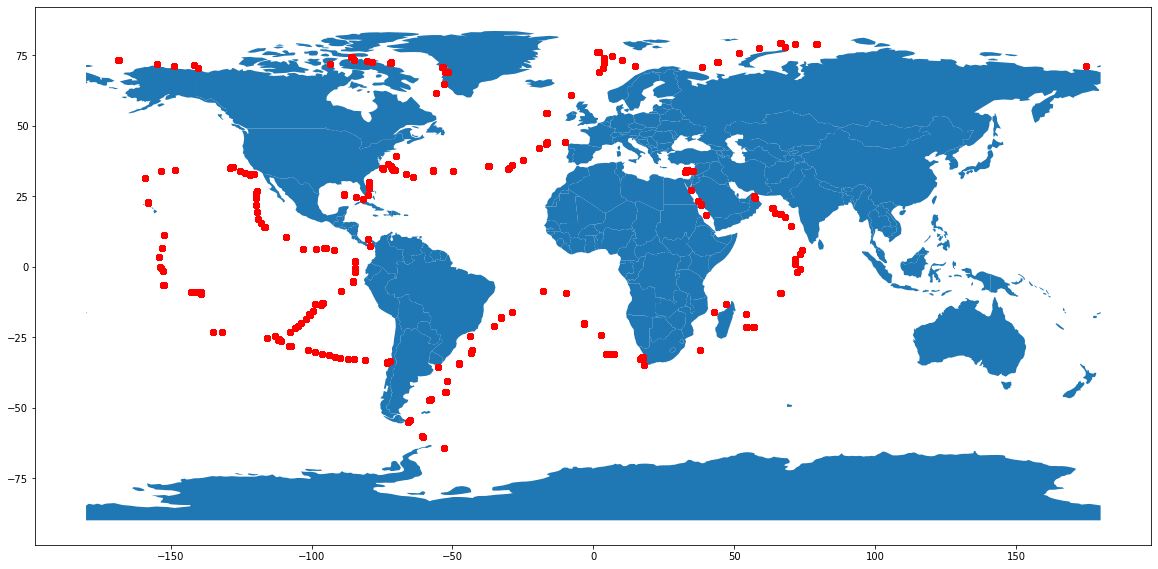

In [24]:
ax = world.plot(figsize=(20, 14))
gdf.plot(ax=ax, color='red')
plt.savefig('Distribution_Tara_Env_all.png')

In [25]:
#read the geographical positions, station names etc of PFTs abundance measurements
r_filenameTXT = '/Users/annasommer/Documents/Documents/Norwich_Project/20200522_PFT/pft_samples_metadata.txt'
with open(r_filenameTXT) as f:
        f.readline()
        rows = [[str(x) for x in line.split(';')] for line in f]
        sample_id_pft, station_id_pft, depth_id_pft, Station_label_pft, Season_pft, Marine_biome_pft, Ocean_region_pft, Lat_pft, Lon_pft, Depth_nominal_pft = [list(col) for col in zip(*rows)] 
        f.close()

In [26]:
Station_label_pft = np.array(Station_label_pft)
Season_pft = np.array(Season_pft)
Lat_pft = np.array(Lat_pft)
Lon_pft = np.array(Lon_pft)
Depth_nominal_pft = np.array(Depth_nominal_pft)

Lat_pft = Lat_pft.astype(np.float)
Lon_pft = Lon_pft.astype(np.float)
Depth_nominal_pft = Depth_nominal_pft.astype(np.float)

In [27]:
Station_label_pft = [x.strip(' ') for x in Station_label_pft]
Season_pft = [x.strip(' ') for x in Season_pft]

In [28]:
PFT_data_position = pd.DataFrame({'station_name': Station_label_pft, 'Season': Season_pft, 'Depth_pft': Depth_nominal_pft, 'lon_pft': Lon_pft, 'lat_pft': Lat_pft}, columns=['station_name','Season','Depth_pft','lon_pft','lat_pft'])
PFT_data_position

,station_name,Season,Depth_pft,lon_pft,lat_pft
0,TARA_093,summer,5.0,-73.1066,-34.0614
1,TARA_034,winter,5.0,39.8750,18.3967
2,TARA_018,autumn,5.0,14.2574,35.7590
3,TARA_082,spring,5.0,-58.2902,-47.1863
4,TARA_042,spring,5.0,73.8955,6.0001
...,...,...,...,...,...
110,TARA_180,summer,5.0,76.1478,74.8023
111,TARA_193,summer,5.0,174.9916,71.0704
112,TARA_155,spring,40.0,-16.7943,54.5451
113,TARA_158,spring,25.0,0.3964,67.1610


In [29]:
PFT_Tara_Station = PFT_data_position.groupby('station_name')

In [30]:
#read PFTs abundance
r_filenameTXT_RelAb = '/Users/annasommer/Documents/Documents/Norwich_Project/20200522_PFT/pft_relative_abundances.txt'
with open(r_filenameTXT_RelAb) as f:
        Tara_station_pft_RA_line = f.readline()
        rows = [[str(x) for x in line.split(' ')] for line in f]
        #a1,a2 = [list(col) for col in zip(*rows)]
        #a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63,a64,a65,a66,a67,a68,a69,a70,a71 = [list(col) for col in zip(*rows)] 
        f.close()

In [31]:
Tara_station_pft_RA = Tara_station_pft_RA_line.split(' ')
Tara_station_pft_RA = Tara_station_pft_RA[2:]

In [32]:
Tara_station_pft_RA[114] = 'TARA_210_SRF'

In [33]:
Relative_abundance = np.zeros((36,115))
name_pft = ["" for x in range(36)]
size_fr = ["" for x in range(36)]
for i in np.arange(0,36,1):
    name_pft[i] = rows[i][0]
    size_fr[i] = rows[i][1]
    for j in np.arange(2,117,1):
        Relative_abundance[i,j-2] = rows[i][j]

In [34]:
PFT_RA = pd.DataFrame({'station_name': Tara_station_pft_RA, str(name_pft[0])+'_'+str(size_fr[0]): Relative_abundance[0,:], str(name_pft[1])+'_'+str(size_fr[1]): Relative_abundance[1,:], str(name_pft[2])+'_'+str(size_fr[2]): Relative_abundance[2,:], str(name_pft[3])+'_'+str(size_fr[3]): Relative_abundance[3,:], str(name_pft[4])+'_'+str(size_fr[4]): Relative_abundance[4,:], str(name_pft[5])+'_'+str(size_fr[5]): Relative_abundance[5,:], str(name_pft[6])+'_'+str(size_fr[6]): Relative_abundance[6,:], str(name_pft[7])+'_'+str(size_fr[7]): Relative_abundance[7,:], str(name_pft[8])+'_'+str(size_fr[8]): Relative_abundance[8,:], str(name_pft[9])+'_'+str(size_fr[9]): Relative_abundance[9,:], str(name_pft[10])+'_'+str(size_fr[10]): Relative_abundance[10,:], str(name_pft[11])+'_'+str(size_fr[11]): Relative_abundance[11,:], str(name_pft[12])+'_'+str(size_fr[12]): Relative_abundance[12,:], str(name_pft[13])+'_'+str(size_fr[13]): Relative_abundance[13,:], str(name_pft[14])+'_'+str(size_fr[14]): Relative_abundance[14,:], str(name_pft[15])+'_'+str(size_fr[15]): Relative_abundance[15,:], str(name_pft[16])+'_'+str(size_fr[16]): Relative_abundance[16,:], str(name_pft[17])+'_'+str(size_fr[17]): Relative_abundance[17,:], str(name_pft[18])+'_'+str(size_fr[18]): Relative_abundance[18,:], str(name_pft[19])+'_'+str(size_fr[19]): Relative_abundance[19,:], str(name_pft[20])+'_'+str(size_fr[20]): Relative_abundance[20,:], str(name_pft[21])+'_'+str(size_fr[21]): Relative_abundance[21,:], str(name_pft[22])+'_'+str(size_fr[22]): Relative_abundance[22,:], str(name_pft[23])+'_'+str(size_fr[23]): Relative_abundance[23,:], str(name_pft[24])+'_'+str(size_fr[24]): Relative_abundance[24,:], str(name_pft[25])+'_'+str(size_fr[25]): Relative_abundance[25,:], str(name_pft[26])+'_'+str(size_fr[26]): Relative_abundance[26,:], str(name_pft[27])+'_'+str(size_fr[27]): Relative_abundance[27,:], str(name_pft[28])+'_'+str(size_fr[28]): Relative_abundance[28,:], str(name_pft[29])+'_'+str(size_fr[29]): Relative_abundance[29,:], str(name_pft[30])+'_'+str(size_fr[30]): Relative_abundance[30,:], str(name_pft[31])+'_'+str(size_fr[31]): Relative_abundance[31,:], str(name_pft[32])+'_'+str(size_fr[32]): Relative_abundance[32,:], str(name_pft[33])+'_'+str(size_fr[33]): Relative_abundance[33,:], str(name_pft[34])+'_'+str(size_fr[34]): Relative_abundance[34,:], str(name_pft[35])+'_'+str(size_fr[35]): Relative_abundance[35,:]}, columns=['station_name','Depth_pft',str(name_pft[0])+'_'+str(size_fr[0]), str(name_pft[1])+'_'+str(size_fr[1]), str(name_pft[2])+'_'+str(size_fr[2]), str(name_pft[3])+'_'+str(size_fr[3]), str(name_pft[4])+'_'+str(size_fr[4]),  str(name_pft[5])+'_'+str(size_fr[5]), str(name_pft[6])+'_'+str(size_fr[6]), str(name_pft[7])+'_'+str(size_fr[7]), str(name_pft[8])+'_'+str(size_fr[8]), str(name_pft[9])+'_'+str(size_fr[9]), str(name_pft[10])+'_'+str(size_fr[10]), str(name_pft[11])+'_'+str(size_fr[11]), str(name_pft[12])+'_'+str(size_fr[12]), str(name_pft[13])+'_'+str(size_fr[13]), str(name_pft[14])+'_'+str(size_fr[14]), str(name_pft[15])+'_'+str(size_fr[15]), str(name_pft[16])+'_'+str(size_fr[16]), str(name_pft[17])+'_'+str(size_fr[17]), str(name_pft[18])+'_'+str(size_fr[18]), str(name_pft[19])+'_'+str(size_fr[19]), str(name_pft[20])+'_'+str(size_fr[20]), str(name_pft[21])+'_'+str(size_fr[21]), str(name_pft[22])+'_'+str(size_fr[22]), str(name_pft[23])+'_'+str(size_fr[23]), str(name_pft[24])+'_'+str(size_fr[24]), str(name_pft[25])+'_'+str(size_fr[25]), str(name_pft[26])+'_'+str(size_fr[26]), str(name_pft[27])+'_'+str(size_fr[27]), str(name_pft[28])+'_'+str(size_fr[28]), str(name_pft[29])+'_'+str(size_fr[29]), str(name_pft[30])+'_'+str(size_fr[30]), str(name_pft[31])+'_'+str(size_fr[31]), str(name_pft[32])+'_'+str(size_fr[32]), str(name_pft[33])+'_'+str(size_fr[33]), str(name_pft[34])+'_'+str(size_fr[34]),str(name_pft[35])+'_'+str(size_fr[35])])
PFT_RA

,station_name,Depth_pft,archaea_prok,coccolithophorides_0.8.5_0.8..,coccolithophorides_180.2000,coccolithophorides_20.180,coccolithophorides_3.20_5.20,crustaceans_0.8.5_0.8..,crustaceans_180.2000,crustaceans_20.180,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,TARA_007_DCM,NaN,0.070738,0.004390,0.000038,0.000150,0.000128,0.000059,0.001634,0.000353,...,2.021930e-06,0.086908,0.369049,0.094144,0.151953,0.370051,0.000088,0.000164,0.000438,7.683333e-05
1,TARA_007_SRF,NaN,0.020836,0.022777,0.000020,0.000122,0.000974,0.000021,0.005062,0.000016,...,2.352190e-06,0.040105,0.460157,0.100087,0.133434,0.496495,0.000007,0.003717,0.000749,7.840634e-06
2,TARA_018_DCM,NaN,0.055361,0.010042,0.000020,0.000062,0.000088,0.000021,0.016112,0.002177,...,5.892186e-06,0.119540,0.440838,0.214219,0.142881,0.103940,0.000018,0.004198,0.000800,5.555490e-05
3,TARA_018_SRF,NaN,0.050494,0.027565,0.000002,0.000454,0.000566,0.000019,0.002902,0.000051,...,2.316570e-05,0.109822,0.456763,0.042371,0.055357,0.217380,0.000007,0.001470,0.001066,2.206838e-04
4,TARA_023_DCM,NaN,0.033117,0.022042,0.000060,0.000214,0.000002,0.000030,0.006329,0.000792,...,7.141108e-07,0.062251,0.482155,0.043459,0.122449,0.006122,0.000030,0.000232,0.000016,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,TARA_205_SRF,NaN,0.006291,0.001320,0.000009,0.000111,0.001222,0.000000,0.000089,0.000002,...,7.424908e-04,0.000049,0.496171,0.028061,0.556722,0.620647,0.000037,0.000028,0.000397,9.281135e-05
111,TARA_206_SRF,NaN,0.026555,0.009629,0.000011,0.000018,0.006075,0.000003,0.043737,0.000007,...,3.010865e-03,0.001345,0.534828,0.013487,0.170330,0.514804,0.000010,0.001768,0.000034,5.247695e-06
112,TARA_208_SRF,NaN,0.004107,0.015497,0.000025,0.000436,0.005988,0.000009,0.000003,0.000003,...,1.310399e-03,0.000324,0.525742,0.008846,0.131684,0.348246,0.000016,0.003355,0.000422,2.454638e-05
113,TARA_209_SRF,NaN,0.038855,0.010119,0.000168,0.000117,0.006035,0.000003,0.007327,0.000478,...,2.679196e-03,0.003249,0.744020,0.007688,0.537086,0.633514,0.000013,0.000070,0.000013,6.583599e-07


In [35]:
station_nameseparation_PFT_RA = PFT_RA.station_name.str.split("_",expand=True)
station_nameseparation_PFT_RA0 = station_nameseparation_PFT_RA[0]
station_nameseparation_PFT_RA1 = station_nameseparation_PFT_RA[1]
station_nameseparation_PFT_RA2 = station_nameseparation_PFT_RA[2]
for i in np.arange(0,115,1):
    Find_depth = PFT_data_position.loc[PFT_data_position['station_name'] == station_nameseparation_PFT_RA0[i] + '_' + station_nameseparation_PFT_RA1[i]]
    if len(Find_depth) == 1: 
        PFT_RA.Depth_pft[i] = float(Find_depth.Depth_pft.values[0])
    if len(Find_depth) == 2:
        if station_nameseparation_PFT_RA2[i] == 'SRF':
            PFT_RA.Depth_pft[i] = float(Find_depth.Depth_pft.values[0])
        else:
            PFT_RA.Depth_pft[i] = float(Find_depth.Depth_pft.values[1])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [36]:
PFT_RA

,station_name,Depth_pft,archaea_prok,coccolithophorides_0.8.5_0.8..,coccolithophorides_180.2000,coccolithophorides_20.180,coccolithophorides_3.20_5.20,crustaceans_0.8.5_0.8..,crustaceans_180.2000,crustaceans_20.180,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,TARA_007_DCM,42,0.070738,0.004390,0.000038,0.000150,0.000128,0.000059,0.001634,0.000353,...,2.021930e-06,0.086908,0.369049,0.094144,0.151953,0.370051,0.000088,0.000164,0.000438,7.683333e-05
1,TARA_007_SRF,9,0.020836,0.022777,0.000020,0.000122,0.000974,0.000021,0.005062,0.000016,...,2.352190e-06,0.040105,0.460157,0.100087,0.133434,0.496495,0.000007,0.003717,0.000749,7.840634e-06
2,TARA_018_DCM,60,0.055361,0.010042,0.000020,0.000062,0.000088,0.000021,0.016112,0.002177,...,5.892186e-06,0.119540,0.440838,0.214219,0.142881,0.103940,0.000018,0.004198,0.000800,5.555490e-05
3,TARA_018_SRF,5,0.050494,0.027565,0.000002,0.000454,0.000566,0.000019,0.002902,0.000051,...,2.316570e-05,0.109822,0.456763,0.042371,0.055357,0.217380,0.000007,0.001470,0.001066,2.206838e-04
4,TARA_023_DCM,55,0.033117,0.022042,0.000060,0.000214,0.000002,0.000030,0.006329,0.000792,...,7.141108e-07,0.062251,0.482155,0.043459,0.122449,0.006122,0.000030,0.000232,0.000016,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,TARA_205_SRF,5,0.006291,0.001320,0.000009,0.000111,0.001222,0.000000,0.000089,0.000002,...,7.424908e-04,0.000049,0.496171,0.028061,0.556722,0.620647,0.000037,0.000028,0.000397,9.281135e-05
111,TARA_206_SRF,5,0.026555,0.009629,0.000011,0.000018,0.006075,0.000003,0.043737,0.000007,...,3.010865e-03,0.001345,0.534828,0.013487,0.170330,0.514804,0.000010,0.001768,0.000034,5.247695e-06
112,TARA_208_SRF,5,0.004107,0.015497,0.000025,0.000436,0.005988,0.000009,0.000003,0.000003,...,1.310399e-03,0.000324,0.525742,0.008846,0.131684,0.348246,0.000016,0.003355,0.000422,2.454638e-05
113,TARA_209_SRF,5,0.038855,0.010119,0.000168,0.000117,0.006035,0.000003,0.007327,0.000478,...,2.679196e-03,0.003249,0.744020,0.007688,0.537086,0.633514,0.000013,0.000070,0.000013,6.583599e-07


In [37]:
PFT_RA.loc[:,'station_name'] ='TARA_' + station_nameseparation_PFT_RA1
PFT_RA

,station_name,Depth_pft,archaea_prok,coccolithophorides_0.8.5_0.8..,coccolithophorides_180.2000,coccolithophorides_20.180,coccolithophorides_3.20_5.20,crustaceans_0.8.5_0.8..,crustaceans_180.2000,crustaceans_20.180,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,TARA_007,42,0.070738,0.004390,0.000038,0.000150,0.000128,0.000059,0.001634,0.000353,...,2.021930e-06,0.086908,0.369049,0.094144,0.151953,0.370051,0.000088,0.000164,0.000438,7.683333e-05
1,TARA_007,9,0.020836,0.022777,0.000020,0.000122,0.000974,0.000021,0.005062,0.000016,...,2.352190e-06,0.040105,0.460157,0.100087,0.133434,0.496495,0.000007,0.003717,0.000749,7.840634e-06
2,TARA_018,60,0.055361,0.010042,0.000020,0.000062,0.000088,0.000021,0.016112,0.002177,...,5.892186e-06,0.119540,0.440838,0.214219,0.142881,0.103940,0.000018,0.004198,0.000800,5.555490e-05
3,TARA_018,5,0.050494,0.027565,0.000002,0.000454,0.000566,0.000019,0.002902,0.000051,...,2.316570e-05,0.109822,0.456763,0.042371,0.055357,0.217380,0.000007,0.001470,0.001066,2.206838e-04
4,TARA_023,55,0.033117,0.022042,0.000060,0.000214,0.000002,0.000030,0.006329,0.000792,...,7.141108e-07,0.062251,0.482155,0.043459,0.122449,0.006122,0.000030,0.000232,0.000016,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,TARA_205,5,0.006291,0.001320,0.000009,0.000111,0.001222,0.000000,0.000089,0.000002,...,7.424908e-04,0.000049,0.496171,0.028061,0.556722,0.620647,0.000037,0.000028,0.000397,9.281135e-05
111,TARA_206,5,0.026555,0.009629,0.000011,0.000018,0.006075,0.000003,0.043737,0.000007,...,3.010865e-03,0.001345,0.534828,0.013487,0.170330,0.514804,0.000010,0.001768,0.000034,5.247695e-06
112,TARA_208,5,0.004107,0.015497,0.000025,0.000436,0.005988,0.000009,0.000003,0.000003,...,1.310399e-03,0.000324,0.525742,0.008846,0.131684,0.348246,0.000016,0.003355,0.000422,2.454638e-05
113,TARA_209,5,0.038855,0.010119,0.000168,0.000117,0.006035,0.000003,0.007327,0.000478,...,2.679196e-03,0.003249,0.744020,0.007688,0.537086,0.633514,0.000013,0.000070,0.000013,6.583599e-07


In [38]:
#merge dataframe of relative abundance with dataframe of metadata for each Tara station
PFT_data_position_Tot = pd.merge(PFT_data_position, PFT_RA,on=['station_name','Depth_pft'])
PFT_data_position_Tot

,station_name,Season,Depth_pft,lon_pft,lat_pft,archaea_prok,coccolithophorides_0.8.5_0.8..,coccolithophorides_180.2000,coccolithophorides_20.180,coccolithophorides_3.20_5.20,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,TARA_093,summer,5,-73.1066,-34.0614,0.000000,0.037354,0.000028,0.000061,0.000015,...,0.000006,0.033923,0.480639,0.329905,0.183219,0.325608,2.265652e-04,0.000646,2.958118e-04,6.929087e-04
1,TARA_034,winter,5,39.8750,18.3967,0.153891,0.017096,0.000325,0.000149,0.000388,...,0.000020,0.024255,0.476499,0.017047,0.069224,0.023754,6.251523e-05,0.000029,3.185932e-04,1.311209e-04
2,TARA_018,autumn,5,14.2574,35.7590,0.050494,0.027565,0.000002,0.000454,0.000566,...,0.000023,0.109822,0.456763,0.042371,0.055357,0.217380,6.545393e-06,0.001470,1.066300e-03,2.206838e-04
3,TARA_082,spring,5,-58.2902,-47.1863,0.026534,0.157317,0.003685,0.008952,0.002439,...,0.002260,0.001941,0.537340,0.122917,0.378723,0.912772,8.744790e-07,0.000029,3.354217e-04,5.411182e-07
4,TARA_042,spring,5,73.8955,6.0001,0.062614,0.019005,0.000000,0.000020,0.000180,...,0.000152,0.053596,0.461110,0.532154,0.137291,0.908058,1.185867e-04,0.000036,1.077203e-03,1.159512e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,TARA_180,summer,5,76.1478,74.8023,0.000063,0.014150,0.001119,0.000484,0.016071,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,1.454408e-06,0.000114,3.571150e-05,3.146713e-07
111,TARA_193,summer,5,174.9916,71.0704,0.000203,0.004232,0.000016,0.000039,0.003016,...,0.000694,0.008019,0.590137,0.032033,0.719912,0.645793,4.114852e-07,0.000000,9.030626e-07,0.000000e+00
112,TARA_155,spring,40,-16.7943,54.5451,0.082681,0.009671,0.000044,0.000054,0.011518,...,0.002371,0.002135,0.089818,0.064029,0.201354,0.372733,1.157574e-06,0.000003,2.247413e-03,1.687793e-06
113,TARA_158,spring,25,0.3964,67.1610,0.069270,0.023631,0.000065,0.000070,0.036934,...,0.001950,0.000224,0.184972,0.580681,0.368729,0.361992,9.981378e-05,0.000292,6.437617e-04,2.416598e-03


In [39]:
#rename station_name in final dataframe of target and environmental variables in order to merge it with RA dataframe
station_nameseparation_env = Interp_Env_4.station_name.str.split("_",expand=True)
station_nameseparation_env1 = station_nameseparation_env.loc[(station_nameseparation_env[1].isnull() == False)][1]
station_nameseparation_env2_test = Interp_Env_4.loc[(station_nameseparation_env[1].isnull() == True)]
station_nameseparation_env2 = station_nameseparation_env2_test['station_name'].astype(str)
result = pd.concat([station_nameseparation_env1,station_nameseparation_env2])
Interp_Env_4.loc[:,'station_name'] ='TARA_' + result

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
Interp_Env_4

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,biovol42,biovol43,biovol44,biovol45,Temp,Salinity,Oxygen_adj,N,date_time_env,geometry
0,2011/01/09 10:56:10,3.1,-64.359,-53.006,"(-64.359, -53.006)",17550.0,TARA_086,59.0,238.033898,18.969091,...,0.0,0.0,0.0,0.0,-0.56975,33.164700,394.81750,19.353712,NaN,POINT (-53.00600 -64.35900)
1,2011/01/09 10:56:10,8.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,TARA_086,91.0,248.142857,2.919556,...,0.0,0.0,0.0,0.0,-0.53510,33.174475,397.85175,19.437510,NaN,POINT (-53.00600 -64.35900)
2,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,TARA_086,68.0,238.926471,12.272182,...,0.0,0.0,0.0,0.0,-0.46006,33.194800,397.28120,19.325014,NaN,POINT (-53.00600 -64.35900)
3,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,TARA_086,214.0,250.285047,1.369713,...,0.0,0.0,0.0,0.0,-0.45667,33.196950,397.20290,19.325014,NaN,POINT (-53.00600 -64.35900)
4,2011/01/09 10:56:10,10.4,-64.359,-53.006,"(-64.359, -53.006)",17550.0,TARA_086,195.0,250.538462,1.171970,...,0.0,0.0,0.0,0.0,-0.45328,33.199100,397.12460,19.325014,NaN,POINT (-53.00600 -64.35900)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504522,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,40.0,210.500000,24.066148,...,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN,POINT (66.48300 79.28600)
504523,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,44.0,228.500000,5.083032,...,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN,POINT (66.48300 79.28600)
504524,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,73.0,210.178082,20.809548,...,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN,POINT (66.48300 79.28600)
504525,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,37.0,226.324324,6.608303,...,0.0,0.0,0.0,0.0,1.46610,34.891000,298.40900,10.059390,NaN,POINT (66.48300 79.28600)


In [41]:
PFT_data_position_Tot_surf = PFT_data_position_Tot.loc[(PFT_data_position_Tot['Depth_pft'] < 20.) == True]
PFT_data_position_Tot_surf

,station_name,Season,Depth_pft,lon_pft,lat_pft,archaea_prok,coccolithophorides_0.8.5_0.8..,coccolithophorides_180.2000,coccolithophorides_20.180,coccolithophorides_3.20_5.20,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,TARA_093,summer,5,-73.1066,-34.0614,0.000000,0.037354,0.000028,0.000061,0.000015,...,0.000006,0.033923,0.480639,0.329905,0.183219,0.325608,2.265652e-04,0.000646,2.958118e-04,6.929087e-04
1,TARA_034,winter,5,39.8750,18.3967,0.153891,0.017096,0.000325,0.000149,0.000388,...,0.000020,0.024255,0.476499,0.017047,0.069224,0.023754,6.251523e-05,0.000029,3.185932e-04,1.311209e-04
2,TARA_018,autumn,5,14.2574,35.7590,0.050494,0.027565,0.000002,0.000454,0.000566,...,0.000023,0.109822,0.456763,0.042371,0.055357,0.217380,6.545393e-06,0.001470,1.066300e-03,2.206838e-04
3,TARA_082,spring,5,-58.2902,-47.1863,0.026534,0.157317,0.003685,0.008952,0.002439,...,0.002260,0.001941,0.537340,0.122917,0.378723,0.912772,8.744790e-07,0.000029,3.354217e-04,5.411182e-07
4,TARA_042,spring,5,73.8955,6.0001,0.062614,0.019005,0.000000,0.000020,0.000180,...,0.000152,0.053596,0.461110,0.532154,0.137291,0.908058,1.185867e-04,0.000036,1.077203e-03,1.159512e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,TARA_163,spring,5,1.3918,76.1825,0.005183,0.111622,0.116111,0.000156,0.147369,...,0.145501,0.000167,0.465830,0.558157,0.816634,0.627472,4.143678e-07,0.000002,0.000000e+00,8.216498e-07
109,TARA_205,autumn,5,-71.8920,72.4693,0.006291,0.001320,0.000009,0.000111,0.001222,...,0.000742,0.000049,0.496171,0.028061,0.556722,0.620647,3.675638e-05,0.000028,3.971315e-04,9.281135e-05
110,TARA_180,summer,5,76.1478,74.8023,0.000063,0.014150,0.001119,0.000484,0.016071,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,1.454408e-06,0.000114,3.571150e-05,3.146713e-07
111,TARA_193,summer,5,174.9916,71.0704,0.000203,0.004232,0.000016,0.000039,0.003016,...,0.000694,0.008019,0.590137,0.032033,0.719912,0.645793,4.114852e-07,0.000000,9.030626e-07,0.000000e+00


In [42]:
#merge two dataframe
ENV_PFT_Merge = pd.merge(Interp_Env_4, PFT_data_position_Tot_surf,on='station_name')
ENV_PFT_Merge

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,2011/01/03 18:40:36,22.6,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,36.0,228.916667,20.529247,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
1,2011/01/03 18:40:36,23.5,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,37.0,232.594595,17.499936,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
2,2011/01/03 18:40:36,24.6,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,44.0,234.522727,20.528470,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
3,2011/01/03 18:40:36,25.9,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,332.0,206.081325,51.756250,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
4,2011/01/03 18:40:36,26.0,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,417.0,241.165468,11.303461,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272600,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,40.0,210.500000,24.066148,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
272601,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,44.0,228.500000,5.083032,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
272602,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,73.0,210.178082,20.809548,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
272603,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,37.0,226.324324,6.608303,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002


In [43]:
Group_Tara_EnvPFT = ENV_PFT_Merge.groupby('station_name')

In [44]:
Group_Tara_EnvPFT['depth'].apply(list).reset_index()

,station_name,depth
0,TARA_030,"[16.3, 49.7, 87.3, 107.8, 120.2, 141.5, 147.4,..."
1,TARA_032,"[8.5, 9.3, 33.6, 50.8, 54.5, 55.5, 68.9, 68.9,..."
2,TARA_034,"[3.4, 3.5, 5.4, 5.8, 5.8, 6.4, 6.6, 6.7, 7.4, ..."
3,TARA_036,"[2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 3.0, ..."
4,TARA_038,"[4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, ..."
...,...,...
58,TARA_205,"[3.4, 3.6, 3.6, 3.9, 4.0, 4.8, 5.0, 5.1, 5.2, ..."
59,TARA_206,"[14.1, 14.6, 18.5, 23.7, 30.0, 30.0, 30.1, 32...."
60,TARA_208,"[3.0, 3.3, 3.4, 3.4, 3.8, 4.2, 5.0, 5.1, 5.1, ..."
61,TARA_209,"[3.7, 3.8, 3.9, 4.3, 4.5, 4.5, 5.3, 5.8, 6.1, ..."


In [45]:
#find data around (+-5m) the depth of RA in order to calculate mean of all variables at this depth in merged dataframe 
ENV_PFT_Depthpft = ENV_PFT_Merge.loc[((ENV_PFT_Merge['depth'] < ENV_PFT_Merge['Depth_pft'] + 5.) & (ENV_PFT_Merge['depth'] > ENV_PFT_Merge['Depth_pft'] - 5.) & (ENV_PFT_Merge['Depth_pft'] < 9.)) == True]
ENV_PFT_Depthpft

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
1304,2011/01/03 11:15:24,3.9,-60.232,-60.645,"(-60.232, -60.645)",17548.0,TARA_084,71.0,242.000000,13.445127,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
1305,2011/01/03 11:15:24,3.9,-60.232,-60.645,"(-60.232, -60.645)",17548.0,TARA_084,60.0,246.083333,6.636549,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
1306,2011/01/03 11:15:24,3.9,-60.232,-60.645,"(-60.232, -60.645)",17548.0,TARA_084,48.0,241.104167,8.863599,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
1307,2011/01/03 11:15:24,4.0,-60.232,-60.645,"(-60.232, -60.645)",17548.0,TARA_084,104.0,196.153846,83.716555,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
1308,2011/01/03 11:15:24,4.0,-60.232,-60.645,"(-60.232, -60.645)",17548.0,TARA_084,44.0,243.681818,7.236126,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270369,2013/07/10 04:10:50,7.8,79.224,66.344,"(79.224, 66.344)",15639.0,TARA_175,39.0,227.769231,6.599288,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
270370,2013/07/10 04:10:50,8.1,79.224,66.344,"(79.224, 66.344)",15639.0,TARA_175,154.0,226.727273,6.282326,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
270371,2013/07/10 04:10:50,8.4,79.224,66.344,"(79.224, 66.344)",15639.0,TARA_175,88.0,228.522727,5.583179,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
270372,2013/07/10 04:10:50,9.6,79.224,66.344,"(79.224, 66.344)",15639.0,TARA_175,38.0,232.394737,2.086501,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002


In [46]:
ENV_PFT_Depthpft_mean = ENV_PFT_Depthpft.groupby(['station_name']).mean()
ENV_PFT_Depthpft_mean

,depth,lat,lon,sample_id,area,mean,stddev,mode,perim.,circ.,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
station_name,,,,,,,,,,,,,,,,,,,,,
TARA_030,6.000000,33.920000,32.826000,13029.000000,39.000000,230.435897,22.615545,249.000000,28.627417,0.598012,...,3.048863e-06,0.023253,0.411054,0.035060,0.064078,0.028974,0.000005,0.001258,0.000097,1.618946e-04
TARA_032,7.625000,23.371750,37.235250,12970.500000,58.500000,237.401149,20.244094,250.500000,33.247936,0.674660,...,3.499181e-06,0.073633,0.442798,0.014518,0.132626,0.061604,0.000347,0.001340,0.002583,9.681067e-05
TARA_034,6.946429,18.397321,39.872179,12980.964286,55.392857,236.719643,16.516071,249.142857,34.443929,0.644071,...,1.966813e-05,0.024255,0.476499,0.017047,0.069224,0.023754,0.000063,0.000029,0.000319,1.311209e-04
TARA_036,6.310116,22.401832,60.942607,12999.424855,96.144509,242.185924,9.367957,249.335260,48.093585,0.560064,...,5.817857e-07,0.014729,0.403138,0.130722,0.171435,0.000749,0.000023,0.000306,0.001923,5.236071e-06
TARA_038,6.258442,19.013844,64.552390,13054.610390,159.922078,240.853159,13.465453,250.181818,73.577019,0.484764,...,1.056086e-04,0.066755,0.347705,0.046368,0.037022,0.144679,0.000000,0.000004,0.000005,4.083879e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARA_205,6.615759,72.432246,-71.936456,15712.805158,81.919771,227.695764,7.783243,233.037249,43.149514,0.543100,...,7.424908e-04,0.000049,0.496171,0.028061,0.556722,0.620647,0.000037,0.000028,0.000397,9.281135e-05
TARA_206,6.368750,70.931375,-53.524958,15724.583333,67.500000,223.790727,11.130052,233.645833,41.098252,0.551202,...,3.010865e-03,0.001345,0.534828,0.013487,0.170330,0.514804,0.000010,0.001768,0.000034,5.247695e-06
TARA_208,6.548276,69.112000,-51.512000,15728.000000,99.724138,225.569951,11.314441,233.172414,46.619543,0.614207,...,1.310399e-03,0.000324,0.525742,0.008846,0.131684,0.348246,0.000016,0.003355,0.000422,2.454638e-05


In [47]:
#estimation of maximal region per Tara station
ENV_PFT_Max = ENV_PFT_Merge.groupby(['station_name']).max()
ENV_PFT_Min = ENV_PFT_Merge.groupby(['station_name']).min()
print('Max diff lat: ',np.max(ENV_PFT_Max['lat'] - ENV_PFT_Min['lat']))
print('Average diff lat: ',np.mean(ENV_PFT_Max['lat'] - ENV_PFT_Min['lat']))
print('Max diff lon: ',np.max(ENV_PFT_Max['lon'] - ENV_PFT_Min['lon']))
print('Average diff lat: ',np.mean(ENV_PFT_Max['lon'] - ENV_PFT_Min['lon']))

Max diff lat:  12.092
Average diff lat:  0.8521111111111112
Max diff lon:  16.97
Average diff lat:  1.5913492063492063


In [48]:
ENV_PFT_Depthpft_mean.columns

Index(['depth', 'lat', 'lon', 'sample_id', 'area', 'mean', 'stddev', 'mode',
       'perim.', 'circ.', 'area_exc', 'fractal', 'watervolume', 'biovol18',
       'biovol19', 'biovol20', 'biovol21', 'biovol22', 'biovol23', 'biovol24',
       'biovol25', 'biovol26', 'biovol27', 'biovol28', 'biovol29', 'biovol30',
       'biovol31', 'biovol32', 'biovol33', 'biovol34', 'biovol35', 'biovol36',
       'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41', 'biovol42',
       'biovol43', 'biovol44', 'biovol45', 'Temp', 'Salinity', 'Oxygen_adj',
       'N', 'lon_pft', 'lat_pft', 'archaea_prok',
       'coccolithophorides_0.8.5_0.8..', 'coccolithophorides_180.2000',
       'coccolithophorides_20.180', 'coccolithophorides_3.20_5.20',
       'crustaceans_0.8.5_0.8..', 'crustaceans_180.2000', 'crustaceans_20.180',
       'crustaceans_3.20_5.20', 'diatoms_0.8.5_0.8..', 'diatoms_180.2000',
       'diatoms_20.180', 'diatoms_3.20_5.20',
       'gelatinous_zooplankton_0.8.5_0.8..', 'gelatinous_zoopla

In [49]:
#data to merge with final dataframe of target and environmental variables
To_merge_mean = ENV_PFT_Depthpft_mean[['Temp', 'Salinity', 'Oxygen_adj',\
                                       'N', 'lon_pft', 'lat_pft', 'archaea_prok',\
                                       'coccolithophorides_0.8.5_0.8..', 'coccolithophorides_180.2000',\
                                       'coccolithophorides_20.180', 'coccolithophorides_3.20_5.20',\
                                       'crustaceans_0.8.5_0.8..', 'crustaceans_180.2000', 'crustaceans_20.180',\
                                       'crustaceans_3.20_5.20', 'diatoms_0.8.5_0.8..', 'diatoms_180.2000',\
                                       'diatoms_20.180', 'diatoms_3.20_5.20',\
                                       'gelatinous_zooplankton_0.8.5_0.8..', 'gelatinous_zooplankton_180.2000',\
                                       'gelatinous_zooplankton_20.180', 'gelatinous_zooplankton_3.20_5.20',\
                                       'heterotrophic_bacteria_prok', 'mesozooplankton_0.8.5_0.8..',\
                                       'mesozooplankton_180.2000', 'mesozooplankton_20.180',\
                                       'mesozooplankton_3.20_5.20', 'n2-fixers_prok',\
                                       'phaeocystis_0.8.5_0.8..', 'phaeocystis_180.2000', 'phaeocystis_20.180',\
                                       'phaeocystis_3.20_5.20', 'picoplankton_prok',\
                                       'protozooplankton_0.8.5_0.8..', 'protozooplankton_180.2000',\
                                       'protozooplankton_20.180', 'protozooplankton_3.20_5.20',\
                                       'pteropods_0.8.5_0.8..', 'pteropods_180.2000', 'pteropods_20.180',\
                                       'pteropods_3.20_5.20']]

In [50]:
To_merge_mean.rename(columns={"Temp": "Temp_mean", "Salinity": "Salinity_mean", "Oxygen_adj": "Oxygen_adj_mean", "N": "N_mean"}, inplace=True)


/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [51]:
#merge to final dataframe
Final_ENV_PFT_Merge = pd.merge(Interp_Env_4, To_merge_mean,on='station_name')
Final_ENV_PFT_Merge

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,2011/01/03 18:40:36,22.6,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,36.0,228.916667,20.529247,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
1,2011/01/03 18:40:36,23.5,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,37.0,232.594595,17.499936,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
2,2011/01/03 18:40:36,24.6,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,44.0,234.522727,20.528470,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
3,2011/01/03 18:40:36,25.9,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,332.0,206.081325,51.756250,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
4,2011/01/03 18:40:36,26.0,-60.410,-60.449,"(-60.41, -60.449)",17549.0,TARA_084,417.0,241.165468,11.303461,...,0.000105,0.000079,0.495257,0.028906,0.527633,0.475379,0.000234,0.001927,0.005523,0.000030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267175,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,40.0,210.500000,24.066148,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
267176,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,44.0,228.500000,5.083032,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
267177,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,73.0,210.178082,20.809548,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002
267178,2013/07/10 11:03:36,233.4,79.286,66.483,"(79.286, 66.483)",15641.0,TARA_175,37.0,226.324324,6.608303,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,0.000002


In [52]:
#read data for biogeochemical variables; first find columns we need
fo = "/Users/annasommer/Documents/Documents/Norwich_Project/Data/Tara_Oceans_Data_RVSS-NISKIN_2009-2013_20140926_toread.txt"
data_env_bio = pd.read_csv(fo, sep=";", encoding='latin1')
columns_name_env_bio = data_env_bio.columns.tolist()

In [53]:
#choice of columns/variables we want to extract from file
k = 0
colum_index_env_bio = [0 for x in range(15)]
for i in np.arange(0,data_env_bio.columns.size,1):
    if columns_name_env_bio[i] == 'Depth [salt water, m]' or columns_name_env_bio[i] == 'yyyy-mm-ddThh:mm:METAVAR:TEXT:40' or columns_name_env_bio[i] == 'Latitude [degrees_north]:METAVAR:DOUBLE' or columns_name_env_bio[i] == 'Longitude [degrees_east]:METAVAR:DOUBLE' or columns_name_env_bio[i] == 'Total Chlorophyll a [mg/m^3]' or columns_name_env_bio[i] == 'Total Chlorophyll b [mg/m^3]' or columns_name_env_bio[i] == 'NO2 [µMol/L]' or columns_name_env_bio[i] == 'PO4 [µMol/L]' or columns_name_env_bio[i] == 'N02NO3 [µMol/L]' or columns_name_env_bio[i] == 'SI [µMol/L]':
        colum_index_env_bio[k] = i
        k = k + 1

In [54]:
#read variables of interest
Env_data_extr_bio = pd.read_csv(fo, sep=";", encoding='latin1',usecols = colum_index_env_bio)
Env_data_extr_bio 

,EVENT_LABEL:METAVAR:TEXT:40,yyyy-mm-ddThh:mm:METAVAR:TEXT:40,Latitude [degrees_north]:METAVAR:DOUBLE,Longitude [degrees_east]:METAVAR:DOUBLE,"Depth [salt water, m]",Total Chlorophyll b [mg/m^3],Total Chlorophyll a [mg/m^3],NO2 [µMol/L],PO4 [µMol/L],N02NO3 [µMol/L],SI [µMol/L]
0,tara_20090920t1558z_005_event_cast,2009-09-20T15:58:56,36.0244,-4.4685,300.0000,NaN,NaN,0.0000,0.0360,0.0125,0.3945
1,tara_20090920t1558z_005_event_cast,2009-09-20T15:58:56,36.0244,-4.4685,190.0000,0.0000,0.0035,0.0000,0.1130,0.0140,0.3800
2,tara_20090920t1558z_005_event_cast,2009-09-20T15:58:56,36.0244,-4.4685,120.0000,0.0052,0.0335,0.0000,0.0295,0.0610,0.3535
3,tara_20090920t1558z_005_event_cast,2009-09-20T15:58:56,36.0244,-4.4685,90.0000,0.0108,0.0572,0.4435,0.1175,2.2145,1.2665
4,tara_20090920t1558z_005_event_cast,2009-09-20T15:58:56,36.0244,-4.4685,65.0000,0.0214,0.0890,0.0000,0.4070,10.5240,6.7585
...,...,...,...,...,...,...,...,...,...,...,...
6898,tara_20131027t2111z_210_event_cast,2013-10-27T21:08:48,61.5163,-55.9838,384.9100,NaN,NaN,NaN,NaN,NaN,NaN
6899,tara_20131027t2111z_210_event_cast,2013-10-27T21:08:48,61.5163,-55.9838,382.9980,NaN,NaN,NaN,NaN,NaN,NaN
6900,tara_20131027t2111z_210_event_cast,2013-10-27T21:08:48,61.5163,-55.9838,381.4620,NaN,NaN,NaN,NaN,NaN,NaN
6901,tara_20131027t2111z_210_event_cast,2013-10-27T21:08:48,61.5163,-55.9838,379.0435,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#rename columns
Env_data_extr_bio.rename(columns={"Latitude [degrees_north]:METAVAR:DOUBLE": "lat", "Longitude [degrees_east]:METAVAR:DOUBLE": "lon"}, inplace=True)
Env_data_extr_bio.rename(columns={"yyyy-mm-ddThh:mm:METAVAR:TEXT:40": "date_time_bio", "Depth [salt water, m]": "depth_bio"}, inplace=True)
Env_data_extr_bio.rename(columns={"NO2 [µMol/L]": "NO2","SI [µMol/L]": "SI"}, inplace=True)
Env_data_extr_bio.rename(columns={"Total Chlorophyll b [mg/m^3]": "Chl_b", "Total Chlorophyll a [mg/m^3]": "Chl_a"}, inplace=True)
Env_data_extr_bio.rename(columns={"PO4 [µMol/L]": "PO4", "N02NO3 [µMol/L]": "NO2NO3"}, inplace=True)

In [56]:
#round lat,lon and depth in biogeochemical variables, add coordinates columns, in order to concatenate 
#with target dataset
Env_data_extr_bio['lat'] = Env_data_extr_bio['lat'].apply(lambda x: round(x, 3))
Env_data_extr_bio['lon'] = Env_data_extr_bio['lon'].apply(lambda x: round(x, 3))
Env_data_extr_bio.rename(columns={"depth_bio": "depth"}, inplace=True)
Env_data_extr_bio['depth'] = Env_data_extr_bio['depth'].apply(lambda x: round(x, 1))
Env_data_extr_bio['coordinates'] = list(zip(Env_data_extr_bio.lat, Env_data_extr_bio.lon))

In [57]:
#preparation of dataset for concatenation
Data_driver_bio_extr1 = Env_data_extr_bio[['date_time_bio','depth','lat','lon','coordinates','NO2','Chl_b','Chl_a','PO4','NO2NO3','SI']]

In [58]:
Data_driver_bio_extr1['station_name'] = np.nan
Data_driver_bio_extr1['sample_id'] = np.nan
Data_driver_bio_extr1['date_time_utc'] = np.nan
Data_driver_bio_extr1['area'] = np.nan
Data_driver_bio_extr1['mean'] = np.nan
Data_driver_bio_extr1['stddev'] = np.nan
Data_driver_bio_extr1['mode'] = np.nan
Data_driver_bio_extr1['perim.'] = np.nan
Data_driver_bio_extr1['circ.'] = np.nan
Data_driver_bio_extr1['area_exc'] = np.nan
Data_driver_bio_extr1['fractal'] = np.nan
Data_driver_env_extr1['watervolume'] = np.nan
Data_driver_env_extr1['biovol18'] = np.nan
Data_driver_env_extr1['biovol19'] = np.nan
Data_driver_env_extr1['biovol20'] = np.nan
Data_driver_env_extr1['biovol21'] = np.nan
Data_driver_env_extr1['biovol22'] = np.nan
Data_driver_env_extr1['biovol23'] = np.nan
Data_driver_env_extr1['biovol24'] = np.nan
Data_driver_env_extr1['biovol25'] = np.nan
Data_driver_env_extr1['biovol26'] = np.nan
Data_driver_env_extr1['biovol27'] = np.nan
Data_driver_env_extr1['biovol28'] = np.nan
Data_driver_env_extr1['biovol29'] = np.nan
Data_driver_env_extr1['biovol30'] = np.nan
Data_driver_env_extr1['biovol31'] = np.nan
Data_driver_env_extr1['biovol32'] = np.nan
Data_driver_env_extr1['biovol33'] = np.nan
Data_driver_env_extr1['biovol34'] = np.nan
Data_driver_env_extr1['biovol35'] = np.nan
Data_driver_env_extr1['biovol36'] = np.nan
Data_driver_env_extr1['biovol37'] = np.nan
Data_driver_env_extr1['biovol38'] = np.nan
Data_driver_env_extr1['biovol39'] = np.nan
Data_driver_env_extr1['biovol40'] = np.nan
Data_driver_env_extr1['biovol41'] = np.nan
Data_driver_env_extr1['biovol42'] = np.nan
Data_driver_env_extr1['biovol43'] = np.nan
Data_driver_env_extr1['biovol44'] = np.nan
Data_driver_env_extr1['biovol45'] = np.nan
Data_driver_bio_extr1['ind_data'] = 1

In [59]:
Data_target_extr2 = data_all_1[['date_time_utc','depth','lat','lon','coordinates','sample_id','station_name','area',\
                                'mean','stddev','mode','perim.','circ.','area_exc','fractal','watervolume',\
                                'biovol18', 'biovol19', 'biovol20', 'biovol21', 'biovol22', 'biovol23',\
                                'biovol24', 'biovol25', 'biovol26', 'biovol27', 'biovol28', 'biovol29',\
                                'biovol30', 'biovol31', 'biovol32', 'biovol33', 'biovol34', 'biovol35',\
                                'biovol36', 'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41',\
                                'biovol42', 'biovol43', 'biovol44', 'biovol45']]
Data_target_extr2

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,biovol36,biovol37,biovol38,biovol39,biovol40,biovol41,biovol42,biovol43,biovol44,biovol45
0,2011/12/30 12:58:14,2.1,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,35.0,194.942857,35.503888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011/12/30 12:58:14,2.1,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,31.0,216.548387,17.947774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011/12/30 12:58:14,2.8,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,70.0,205.857143,25.875558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011/12/30 12:58:14,2.9,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,49.0,215.244898,13.289298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011/12/30 12:58:14,3.5,9.849,-80.038,"(9.849, -80.038)",12552,tara_141_00_a,193.0,202.720207,27.659659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514105,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,131.0,232.190840,31.298099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514106,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,361.0,216.975069,53.414750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514107,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,71.0,236.211268,22.182951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514108,2011/12/21 19:21:30,224.3,7.419,-79.319,"(7.419, -79.319)",17811,tara_140_00_b,77.0,242.688312,9.720109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
Data_target_extr2['NO2'] = np.nan
Data_target_extr2['Chl_b'] = np.nan
Data_target_extr2['Chl_a'] = np.nan
Data_target_extr2['PO4'] = np.nan
Data_target_extr2['NO2NO3'] = np.nan
Data_target_extr2['SI'] = np.nan
Data_target_extr2['date_time_bio'] = np.nan
Data_target_extr2['ind_data'] = 0

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
#concatenation of target datset and biogeochemical variables 
Concat_to_interp_test2 = pd.concat([Data_target_extr2, Data_driver_bio_extr1], ignore_index=True, sort=False).sort_values(['coordinates', 'depth'])

In [62]:
#interpolation of all variables in concatenated dataframe per columns grouped by coordinates; 
#interpolation of data at the depth from target dataset
Interp_test_bio = Concat_to_interp_test2.groupby(['coordinates']).apply(lambda x: x.interpolate(method='linear')).reset_index()
Interp_test_bio = Interp_test_bio[['station_name','date_time_utc', 'depth', 'lat', 'lon', 'coordinates', 'sample_id','area','mean','stddev','mode','perim.','circ.',\
                                   'area_exc','fractal','watervolume',\
                                   'biovol18', 'biovol19', 'biovol20', 'biovol21', 'biovol22', 'biovol23',\
                                   'biovol24', 'biovol25', 'biovol26', 'biovol27', 'biovol28', 'biovol29',\
                                   'biovol30', 'biovol31', 'biovol32', 'biovol33', 'biovol34', 'biovol35',\
                                   'biovol36', 'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41',\
                                   'biovol42', 'biovol43', 'biovol44', 'biovol45','NO2','Chl_b','Chl_a','PO4','NO2NO3','SI','ind_data']]


In [63]:
#extract the data from interpolated dataferame that corresponds to initial target dataframe
Interp_Bio_1 = Interp_test_bio.loc[Interp_test_bio['ind_data'] == 0].drop('ind_data', axis=1).reset_index(drop=True)

In [64]:
#sum of nan values per variable
Interp_Bio_1.isnull().sum()

station_name          0
date_time_utc         0
depth                 0
lat                   0
lon                   0
coordinates           0
sample_id             0
area                  0
mean                  0
stddev                0
mode                  0
perim.                0
circ.                 0
area_exc              0
fractal               0
watervolume        1945
biovol18           1945
biovol19           1945
biovol20           1945
biovol21           1945
biovol22           1945
biovol23           1945
biovol24           1945
biovol25           1945
biovol26           1945
biovol27           1945
biovol28           1945
biovol29           1945
biovol30           1945
biovol31           1945
biovol32           1945
biovol33           1945
biovol34           1945
biovol35           1945
biovol36           1945
biovol37           1945
biovol38           1945
biovol39           1945
biovol40           1945
biovol41           1945
biovol42           1945
biovol43        

In [65]:
#remove rows where Chl_b is nan
Interp_Bio_2 = Interp_Bio_1.loc[(Interp_Bio_1['Chl_b'].isnull() == False)]
Interp_Bio_2.isnull().sum()

station_name         0
date_time_utc        0
depth                0
lat                  0
lon                  0
coordinates          0
sample_id            0
area                 0
mean                 0
stddev               0
mode                 0
perim.               0
circ.                0
area_exc             0
fractal              0
watervolume        224
biovol18           224
biovol19           224
biovol20           224
biovol21           224
biovol22           224
biovol23           224
biovol24           224
biovol25           224
biovol26           224
biovol27           224
biovol28           224
biovol29           224
biovol30           224
biovol31           224
biovol32           224
biovol33           224
biovol34           224
biovol35           224
biovol36           224
biovol37           224
biovol38           224
biovol39           224
biovol40           224
biovol41           224
biovol42           224
biovol43           224
biovol44           224
biovol45   

In [66]:
#remove rows where PO4 is nan
Interp_Bio_3 = Interp_Bio_2.loc[(Interp_Bio_2['PO4'].isnull() == False)]
Interp_Bio_3.isnull().sum()

station_name       0
date_time_utc      0
depth              0
lat                0
lon                0
coordinates        0
sample_id          0
area               0
mean               0
stddev             0
mode               0
perim.             0
circ.              0
area_exc           0
fractal            0
watervolume      213
biovol18         213
biovol19         213
biovol20         213
biovol21         213
biovol22         213
biovol23         213
biovol24         213
biovol25         213
biovol26         213
biovol27         213
biovol28         213
biovol29         213
biovol30         213
biovol31         213
biovol32         213
biovol33         213
biovol34         213
biovol35         213
biovol36         213
biovol37         213
biovol38         213
biovol39         213
biovol40         213
biovol41         213
biovol42         213
biovol43         213
biovol44         213
biovol45         213
NO2               42
Chl_b              0
Chl_a              0
PO4          

In [67]:
#remove rows where NO2 is nan
Interp_Bio_4 = Interp_Bio_3.loc[(Interp_Bio_3['NO2'].isnull() == False)]
Interp_Bio_4.isnull().sum()

station_name       0
date_time_utc      0
depth              0
lat                0
lon                0
coordinates        0
sample_id          0
area               0
mean               0
stddev             0
mode               0
perim.             0
circ.              0
area_exc           0
fractal            0
watervolume      213
biovol18         213
biovol19         213
biovol20         213
biovol21         213
biovol22         213
biovol23         213
biovol24         213
biovol25         213
biovol26         213
biovol27         213
biovol28         213
biovol29         213
biovol30         213
biovol31         213
biovol32         213
biovol33         213
biovol34         213
biovol35         213
biovol36         213
biovol37         213
biovol38         213
biovol39         213
biovol40         213
biovol41         213
biovol42         213
biovol43         213
biovol44         213
biovol45         213
NO2                0
Chl_b              0
Chl_a              0
PO4          

In [68]:
Interp_Bio_4

,station_name,date_time_utc,depth,lat,lon,coordinates,sample_id,area,mean,stddev,...,biovol42,biovol43,biovol44,biovol45,NO2,Chl_b,Chl_a,PO4,NO2NO3,SI
2438,tara_086_00_b,2011/01/09 17:25:22,3.2,-64.349,-53.102,"(-64.349, -53.102)",17551.0,70.0,207.528571,65.792322,...,0.0,0.0,0.0,0.0,0.070500,0.00185,0.163550,1.553000,17.320000,64.010000
2439,tara_086_00_b,2011/01/09 17:25:22,14.6,-64.349,-53.102,"(-64.349, -53.102)",17551.0,36.0,231.250000,21.616627,...,0.0,0.0,0.0,0.0,0.057500,0.00000,0.209425,1.955250,22.577500,64.080000
2440,tara_086_00_b,2011/01/09 17:25:22,17.5,-64.349,-53.102,"(-64.349, -53.102)",17551.0,41.0,238.365854,14.954525,...,0.0,0.0,0.0,0.0,0.056000,0.00000,0.248150,2.098500,24.615000,62.600000
2441,tara_086_00_b,2011/01/09 17:25:22,18.9,-64.349,-53.102,"(-64.349, -53.102)",17551.0,42.0,230.714286,20.919457,...,0.0,0.0,0.0,0.0,0.054500,0.00000,0.286875,2.241750,26.652500,61.120000
2442,tara_086_00_b,2011/01/09 17:25:22,21.0,-64.349,-53.102,"(-64.349, -53.102)",17551.0,49.0,235.775510,14.533389,...,0.0,0.0,0.0,0.0,0.053167,0.00000,0.326886,2.386694,28.726944,59.853333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495852,175,2013/07/10 08:28:30,378.5,79.202,66.505,"(79.202, 66.505)",15640.0,65.0,218.492308,12.789306,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183
495853,175,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,74.0,206.743243,27.125816,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183
495854,175,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,59.0,207.983051,25.502192,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183
495855,175,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,71.0,211.042254,21.074993,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183


In [69]:
#rename station names in biogeochemical variables data frame to further merge with PFT dataframe
station_nameseparation_env = Interp_Bio_4.station_name.str.split("_",expand=True)
station_nameseparation_env1 = station_nameseparation_env.loc[(station_nameseparation_env[1].isnull() == False)][1]
station_nameseparation_env2_test = Interp_Bio_4.loc[(station_nameseparation_env[1].isnull() == True)]
station_nameseparation_env2 = station_nameseparation_env2_test['station_name'].astype(str)
result = pd.concat([station_nameseparation_env1,station_nameseparation_env2])
Interp_Bio_4.loc[:,'station_name'] ='TARA_' + result
Interp_Bio_4

,station_name,date_time_utc,depth,lat,lon,coordinates,sample_id,area,mean,stddev,...,biovol42,biovol43,biovol44,biovol45,NO2,Chl_b,Chl_a,PO4,NO2NO3,SI
2438,TARA_086,2011/01/09 17:25:22,3.2,-64.349,-53.102,"(-64.349, -53.102)",17551.0,70.0,207.528571,65.792322,...,0.0,0.0,0.0,0.0,0.070500,0.00185,0.163550,1.553000,17.320000,64.010000
2439,TARA_086,2011/01/09 17:25:22,14.6,-64.349,-53.102,"(-64.349, -53.102)",17551.0,36.0,231.250000,21.616627,...,0.0,0.0,0.0,0.0,0.057500,0.00000,0.209425,1.955250,22.577500,64.080000
2440,TARA_086,2011/01/09 17:25:22,17.5,-64.349,-53.102,"(-64.349, -53.102)",17551.0,41.0,238.365854,14.954525,...,0.0,0.0,0.0,0.0,0.056000,0.00000,0.248150,2.098500,24.615000,62.600000
2441,TARA_086,2011/01/09 17:25:22,18.9,-64.349,-53.102,"(-64.349, -53.102)",17551.0,42.0,230.714286,20.919457,...,0.0,0.0,0.0,0.0,0.054500,0.00000,0.286875,2.241750,26.652500,61.120000
2442,TARA_086,2011/01/09 17:25:22,21.0,-64.349,-53.102,"(-64.349, -53.102)",17551.0,49.0,235.775510,14.533389,...,0.0,0.0,0.0,0.0,0.053167,0.00000,0.326886,2.386694,28.726944,59.853333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495852,TARA_175,2013/07/10 08:28:30,378.5,79.202,66.505,"(79.202, 66.505)",15640.0,65.0,218.492308,12.789306,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183
495853,TARA_175,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,74.0,206.743243,27.125816,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183
495854,TARA_175,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,59.0,207.983051,25.502192,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183
495855,TARA_175,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,71.0,211.042254,21.074993,...,0.0,0.0,0.0,0.0,0.013000,0.00390,0.028200,0.715865,11.328000,4.552183


In [70]:
#plot geographical positions of biogeochemical variables
gdf1 = geopandas.GeoDataFrame(Interp_Bio_4, geometry=geopandas.points_from_xy(Interp_Bio_4.lon, Interp_Bio_4.lat))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

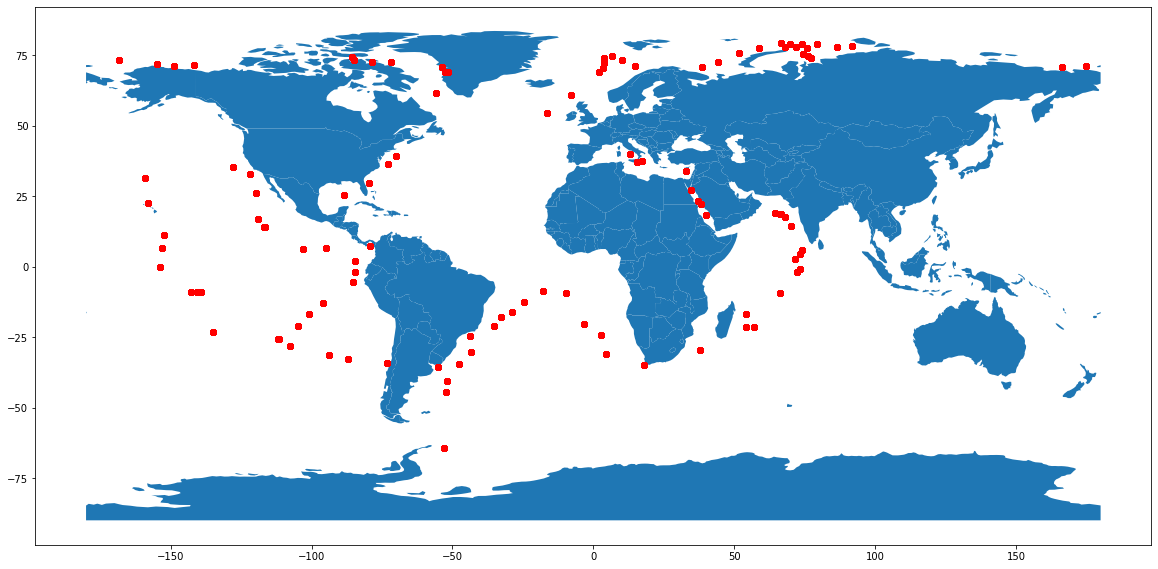

In [71]:
ax = world.plot(figsize=(20, 14))
gdf1.plot(ax=ax, color='red')
plt.savefig('Distribution_Tara_Bio_all.png')

In [72]:
#merge the biogeochemical variables' dataframe and PFT abundance dataframe
BIO_PFT_Merge = pd.merge(Interp_Bio_4, PFT_data_position_Tot,on='station_name')

In [73]:
#extract only the data at the surface
BIO_PFT_Depthpft = BIO_PFT_Merge.loc[((BIO_PFT_Merge['depth'] < BIO_PFT_Merge['Depth_pft'] + 5.) & (BIO_PFT_Merge['depth'] > BIO_PFT_Merge['Depth_pft'] - 5.) & (BIO_PFT_Merge['Depth_pft'] < 9.)) == True]
BIO_PFT_Depthpft

,station_name,date_time_utc,depth,lat,lon,coordinates,sample_id,area,mean,stddev,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,TARA_066,2010/07/15 12:29:04,5.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,51.0,224.196078,55.957848,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
1,TARA_066,2010/07/15 12:29:04,6.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,84.0,249.214286,3.147274,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
2,TARA_066,2010/07/15 12:29:04,6.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,48.0,241.500000,8.949028,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
3,TARA_066,2010/07/15 12:29:04,7.2,-34.936,17.937,"(-34.936, 17.937)",13217.0,34.0,241.264706,7.875196,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
4,TARA_066,2010/07/15 12:29:04,8.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,205.0,237.878049,20.870745,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56106,TARA_180,2013/07/18 02:08:55,9.0,74.802,76.150,"(74.802, 76.15)",15659.0,43.0,218.046512,20.622403,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07
56107,TARA_180,2013/07/18 02:08:55,9.0,74.802,76.150,"(74.802, 76.15)",15659.0,44.0,225.204545,13.805256,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07
56108,TARA_180,2013/07/18 02:08:55,9.0,74.802,76.150,"(74.802, 76.15)",15659.0,55.0,231.054545,4.707827,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07
56109,TARA_180,2013/07/18 02:08:55,9.0,74.802,76.150,"(74.802, 76.15)",15659.0,209.0,221.468900,13.631491,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07


In [74]:
#estimate the mean value of biogeochemical variables at PFT depth
BIO_PFT_Depthpft_mean = BIO_PFT_Depthpft.groupby(['station_name']).mean()
BIO_PFT_Depthpft_mean

,depth,lat,lon,sample_id,area,mean,stddev,mode,perim.,circ.,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
station_name,,,,,,,,,,,,,,,,,,,,,
TARA_034,6.737500,18.398000,39.862000,12983.000000,50.000000,236.220000,17.470625,250.375000,33.645000,0.622875,...,0.000020,0.024255,0.476499,0.017047,0.069224,0.023754,6.251523e-05,0.000029,3.185932e-04,1.311209e-04
TARA_038,3.118182,19.026000,64.623000,13040.000000,107.636364,248.918682,2.684063,251.727273,59.039604,0.557443,...,0.000106,0.066755,0.347705,0.046368,0.037022,0.144679,0.000000e+00,0.000004,5.414400e-06,4.083879e-05
TARA_041,7.833333,14.560000,70.012000,13119.000000,59.000000,243.457305,7.673062,247.666667,39.327585,0.544725,...,0.000000,0.066208,0.572282,0.531140,0.311000,0.003425,1.070206e-04,0.000030,1.409725e-03,3.182607e-04
TARA_064,6.300000,-29.496000,37.951000,13196.000000,87.000000,236.770115,31.754766,252.000000,52.426407,0.397767,...,0.000000,0.054143,0.492012,0.585522,0.081818,0.698198,2.506963e-06,0.000014,2.456485e-04,3.631251e-07
TARA_066,7.000000,-34.936000,17.937000,13217.000000,106.000000,238.680972,19.565886,246.833333,63.938252,0.487579,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,7.485559e-05,3.775196e-07
TARA_070,7.500000,-20.411000,-3.176000,13273.000000,198.000000,239.609666,16.737112,250.666667,87.006445,0.329989,...,0.000048,0.153761,0.583707,0.256609,0.046710,0.396892,8.472889e-07,0.000485,8.242610e-05,2.068824e-06
TARA_093,7.054167,-34.066000,-73.098000,17554.000000,52.333333,235.806830,17.785049,248.250000,34.415763,0.635644,...,0.000006,0.033923,0.480639,0.329905,0.183219,0.325608,2.265652e-04,0.000646,2.958118e-04,6.929087e-04
TARA_094,6.580000,-32.775000,-87.097000,17560.000000,43.800000,241.673529,9.943460,251.400000,28.013203,0.716352,...,0.000038,0.078418,0.458522,0.417909,0.383993,0.682627,1.226687e-05,0.000055,5.123649e-05,3.182409e-06
TARA_099,4.325000,-21.172000,-104.902000,17600.000000,51.000000,237.352009,17.350527,250.250000,29.884776,0.730333,...,0.000045,0.068978,0.433274,0.076886,0.119212,0.586688,3.301161e-05,0.000000,1.190431e-05,7.736645e-05


In [75]:
BIO_PFT_Depthpft_mean.columns

Index(['depth', 'lat', 'lon', 'sample_id', 'area', 'mean', 'stddev', 'mode',
       'perim.', 'circ.', 'area_exc', 'fractal', 'watervolume', 'biovol18',
       'biovol19', 'biovol20', 'biovol21', 'biovol22', 'biovol23', 'biovol24',
       'biovol25', 'biovol26', 'biovol27', 'biovol28', 'biovol29', 'biovol30',
       'biovol31', 'biovol32', 'biovol33', 'biovol34', 'biovol35', 'biovol36',
       'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41', 'biovol42',
       'biovol43', 'biovol44', 'biovol45', 'NO2', 'Chl_b', 'Chl_a', 'PO4',
       'NO2NO3', 'SI', 'lon_pft', 'lat_pft', 'archaea_prok',
       'coccolithophorides_0.8.5_0.8..', 'coccolithophorides_180.2000',
       'coccolithophorides_20.180', 'coccolithophorides_3.20_5.20',
       'crustaceans_0.8.5_0.8..', 'crustaceans_180.2000', 'crustaceans_20.180',
       'crustaceans_3.20_5.20', 'diatoms_0.8.5_0.8..', 'diatoms_180.2000',
       'diatoms_20.180', 'diatoms_3.20_5.20',
       'gelatinous_zooplankton_0.8.5_0.8..', 'gelatino

In [76]:
#data to merge with final dataframe of target and biogeochemical variables
To_merge_Bio_mean = BIO_PFT_Depthpft_mean[['NO2', 'Chl_b', 'Chl_a', 'PO4', \
                                           'NO2NO3', 'SI', 'lon_pft', 'lat_pft', 'archaea_prok',\
                                           'coccolithophorides_0.8.5_0.8..', 'coccolithophorides_180.2000',\
                                           'coccolithophorides_20.180', 'coccolithophorides_3.20_5.20',\
                                           'crustaceans_0.8.5_0.8..', 'crustaceans_180.2000', 'crustaceans_20.180',\
                                           'crustaceans_3.20_5.20', 'diatoms_0.8.5_0.8..', 'diatoms_180.2000',\
                                           'diatoms_20.180', 'diatoms_3.20_5.20',\
                                           'gelatinous_zooplankton_0.8.5_0.8..', 'gelatinous_zooplankton_180.2000',\
                                           'gelatinous_zooplankton_20.180', 'gelatinous_zooplankton_3.20_5.20',\
                                           'heterotrophic_bacteria_prok', 'mesozooplankton_0.8.5_0.8..',\
                                           'mesozooplankton_180.2000', 'mesozooplankton_20.180',\
                                           'mesozooplankton_3.20_5.20', 'n2-fixers_prok',\
                                           'phaeocystis_0.8.5_0.8..', 'phaeocystis_180.2000', 'phaeocystis_20.180',\
                                           'phaeocystis_3.20_5.20', 'picoplankton_prok',\
                                           'protozooplankton_0.8.5_0.8..', 'protozooplankton_180.2000',\
                                           'protozooplankton_20.180', 'protozooplankton_3.20_5.20',\
                                           'pteropods_0.8.5_0.8..', 'pteropods_180.2000', 'pteropods_20.180',\
                                           'pteropods_3.20_5.20']]

In [77]:
To_merge_Bio_mean.rename(columns={"NO2": "NO2_mean", "Chl_b": "Chl_b_mean", "Chl_a": "Chl_a_mean", "PO4": "PO4_mean", "NO2NO3": "NO2NO3_mean", "SI": "SI_mean"}, inplace=True)


/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [78]:
#merge to final dataframe
Final_BIO_PFT_Merge = pd.merge(Interp_Bio_4, To_merge_Bio_mean,on='station_name')
Final_BIO_PFT_Merge

,station_name,date_time_utc,depth,lat,lon,coordinates,sample_id,area,mean,stddev,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,TARA_066,2010/07/15 12:29:04,5.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,51.0,224.196078,55.957848,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
1,TARA_066,2010/07/15 12:29:04,6.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,84.0,249.214286,3.147274,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
2,TARA_066,2010/07/15 12:29:04,6.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,48.0,241.500000,8.949028,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
3,TARA_066,2010/07/15 12:29:04,7.2,-34.936,17.937,"(-34.936, 17.937)",13217.0,34.0,241.264706,7.875196,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
4,TARA_066,2010/07/15 12:29:04,8.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,205.0,237.878049,20.870745,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35658,TARA_180,2013/07/18 02:08:55,26.2,74.802,76.150,"(74.802, 76.15)",15659.0,53.0,208.094340,46.247771,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07
35659,TARA_180,2013/07/18 02:08:55,26.2,74.802,76.150,"(74.802, 76.15)",15659.0,33.0,208.606061,33.233021,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07
35660,TARA_180,2013/07/18 02:08:55,26.2,74.802,76.150,"(74.802, 76.15)",15659.0,64.0,208.593750,37.065244,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07
35661,TARA_180,2013/07/18 02:08:55,26.2,74.802,76.150,"(74.802, 76.15)",15659.0,65.0,227.815385,9.537578,...,0.000684,0.000000,0.541347,0.043772,0.618644,0.620900,0.000001,0.000114,0.000036,3.146713e-07


In [79]:
#merge environmental+target and biogeochemical+target dataframes
TOT_Merge = pd.merge(Interp_Env_4,Interp_Bio_4,on=['station_name','date_time_utc', 'depth', 'lat', 'lon', 'coordinates',\
                                                   'sample_id','area','mean','stddev','mode','perim.','circ.','area_exc',\
                                                   'fractal','watervolume','biovol18', 'biovol19', 'biovol20', \
                                                   'biovol21', 'biovol22', 'biovol23','biovol24', 'biovol25', 'biovol26',\
                                                   'biovol27', 'biovol28', 'biovol29','biovol30', 'biovol31',\
                                                   'biovol32', 'biovol33', 'biovol34', 'biovol35','biovol36', \
                                                   'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41',\
                                                   'biovol42', 'biovol43', 'biovol44', 'biovol45','coordinates'])
TOT_Merge

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,N,date_time_env,geometry_x,NO2,Chl_b,Chl_a,PO4,NO2NO3,SI,geometry_y
0,2011/01/09 17:25:22,3.2,-64.349,-53.102,"(-64.349, -53.102)",17551.0,TARA_086,70.0,207.528571,65.792322,...,19.828950,NaN,POINT (-53.10200 -64.34900),0.070500,0.00185,0.163550,1.553000,17.320000,64.010000,POINT (-53.10200 -64.34900)
1,2011/01/09 17:25:22,14.6,-64.349,-53.102,"(-64.349, -53.102)",17551.0,TARA_086,36.0,231.250000,21.616627,...,19.591331,NaN,POINT (-53.10200 -64.34900),0.057500,0.00000,0.209425,1.955250,22.577500,64.080000,POINT (-53.10200 -64.34900)
2,2011/01/09 17:25:22,17.5,-64.349,-53.102,"(-64.349, -53.102)",17551.0,TARA_086,41.0,238.365854,14.954525,...,19.760075,NaN,POINT (-53.10200 -64.34900),0.056000,0.00000,0.248150,2.098500,24.615000,62.600000,POINT (-53.10200 -64.34900)
3,2011/01/09 17:25:22,18.9,-64.349,-53.102,"(-64.349, -53.102)",17551.0,TARA_086,42.0,230.714286,20.919457,...,21.188658,NaN,POINT (-53.10200 -64.34900),0.054500,0.00000,0.286875,2.241750,26.652500,61.120000,POINT (-53.10200 -64.34900)
4,2011/01/09 17:25:22,21.0,-64.349,-53.102,"(-64.349, -53.102)",17551.0,TARA_086,49.0,235.775510,14.533389,...,22.368832,NaN,POINT (-53.10200 -64.34900),0.053167,0.00000,0.326886,2.386694,28.726944,59.853333,POINT (-53.10200 -64.34900)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80537,2013/07/10 08:28:30,378.5,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,65.0,218.492308,12.789306,...,12.179281,NaN,POINT (66.50500 79.20200),0.013000,0.00390,0.028200,0.715865,11.328000,4.552183,POINT (66.50500 79.20200)
80538,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,74.0,206.743243,27.125816,...,12.179281,NaN,POINT (66.50500 79.20200),0.013000,0.00390,0.028200,0.715865,11.328000,4.552183,POINT (66.50500 79.20200)
80539,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,59.0,207.983051,25.502192,...,12.179281,NaN,POINT (66.50500 79.20200),0.013000,0.00390,0.028200,0.715865,11.328000,4.552183,POINT (66.50500 79.20200)
80540,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,71.0,211.042254,21.074993,...,12.179281,NaN,POINT (66.50500 79.20200),0.013000,0.00390,0.028200,0.715865,11.328000,4.552183,POINT (66.50500 79.20200)


In [80]:
TOT_Merge.columns

Index(['date_time_utc', 'depth', 'lat', 'lon', 'coordinates', 'sample_id',
       'station_name', 'area', 'mean', 'stddev', 'mode', 'perim.', 'circ.',
       'area_exc', 'fractal', 'watervolume', 'biovol18', 'biovol19',
       'biovol20', 'biovol21', 'biovol22', 'biovol23', 'biovol24', 'biovol25',
       'biovol26', 'biovol27', 'biovol28', 'biovol29', 'biovol30', 'biovol31',
       'biovol32', 'biovol33', 'biovol34', 'biovol35', 'biovol36', 'biovol37',
       'biovol38', 'biovol39', 'biovol40', 'biovol41', 'biovol42', 'biovol43',
       'biovol44', 'biovol45', 'Temp', 'Salinity', 'Oxygen_adj', 'N',
       'date_time_env', 'geometry_x', 'NO2', 'Chl_b', 'Chl_a', 'PO4', 'NO2NO3',
       'SI', 'geometry_y'],
      dtype='object')

In [81]:
#merge total dataframe
TOT_Merge_PFT = pd.merge(TOT_Merge, PFT_data_position_Tot,on='station_name')
TOT_Merge_PFT

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,2010/07/15 12:29:04,5.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,51.0,224.196078,55.957848,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
1,2010/07/15 12:29:04,6.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,84.0,249.214286,3.147274,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
2,2010/07/15 12:29:04,6.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,48.0,241.500000,8.949028,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
3,2010/07/15 12:29:04,7.2,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,34.0,241.264706,7.875196,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
4,2010/07/15 12:29:04,8.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,205.0,237.878049,20.870745,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,0.000010,0.000227,0.000075,3.775196e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57721,2013/07/10 08:28:30,378.5,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,65.0,218.492308,12.789306,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,1.766372e-06
57722,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,74.0,206.743243,27.125816,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,1.766372e-06
57723,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,59.0,207.983051,25.502192,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,1.766372e-06
57724,2013/07/10 08:28:30,378.6,79.202,66.505,"(79.202, 66.505)",15640.0,TARA_175,71.0,211.042254,21.074993,...,0.007198,0.000116,0.814663,0.181528,0.571021,0.785986,0.000003,0.011632,0.000560,1.766372e-06


In [82]:
TOT_Merge_PFT.columns

Index(['date_time_utc', 'depth', 'lat', 'lon', 'coordinates', 'sample_id',
       'station_name', 'area', 'mean', 'stddev', 'mode', 'perim.', 'circ.',
       'area_exc', 'fractal', 'watervolume', 'biovol18', 'biovol19',
       'biovol20', 'biovol21', 'biovol22', 'biovol23', 'biovol24', 'biovol25',
       'biovol26', 'biovol27', 'biovol28', 'biovol29', 'biovol30', 'biovol31',
       'biovol32', 'biovol33', 'biovol34', 'biovol35', 'biovol36', 'biovol37',
       'biovol38', 'biovol39', 'biovol40', 'biovol41', 'biovol42', 'biovol43',
       'biovol44', 'biovol45', 'Temp', 'Salinity', 'Oxygen_adj', 'N',
       'date_time_env', 'geometry_x', 'NO2', 'Chl_b', 'Chl_a', 'PO4', 'NO2NO3',
       'SI', 'geometry_y', 'Season', 'Depth_pft', 'lon_pft', 'lat_pft',
       'archaea_prok', 'coccolithophorides_0.8.5_0.8..',
       'coccolithophorides_180.2000', 'coccolithophorides_20.180',
       'coccolithophorides_3.20_5.20', 'crustaceans_0.8.5_0.8..',
       'crustaceans_180.2000', 'crustaceans_20.180',

In [83]:
#find data at the surface in order to estimate mean surface values of driver variables
TOT_Merge_PFT_surf= TOT_Merge_PFT.loc[((TOT_Merge_PFT['depth'] < TOT_Merge_PFT['Depth_pft'] + 5.) & (TOT_Merge_PFT['depth'] > TOT_Merge_PFT['Depth_pft'] - 5.) & (TOT_Merge_PFT['Depth_pft'] < 9.)) == True]
TOT_Merge_PFT_surf

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
0,2010/07/15 12:29:04,5.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,51.0,224.196078,55.957848,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
1,2010/07/15 12:29:04,6.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,84.0,249.214286,3.147274,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
2,2010/07/15 12:29:04,6.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,48.0,241.500000,8.949028,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
3,2010/07/15 12:29:04,7.2,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,34.0,241.264706,7.875196,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
4,2010/07/15 12:29:04,8.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,205.0,237.878049,20.870745,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49635,2013/09/30 19:33:10,8.2,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,38.0,226.368421,8.836109,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07
49637,2013/09/30 19:33:10,8.4,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,44.0,202.000000,49.125374,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07
49639,2013/09/30 19:33:10,8.4,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,82.0,225.097561,11.116232,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07
49641,2013/09/30 19:33:10,9.2,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,59.0,233.661017,1.168704,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07


In [84]:
#estimation of mean values at the surface per Tara station
TOT_Merge_PFT_surf_mean = TOT_Merge_PFT_surf.groupby(['station_name']).mean()
TOT_Merge_PFT_surf_mean

,depth,lat,lon,sample_id,area,mean,stddev,mode,perim.,circ.,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
station_name,,,,,,,,,,,,,,,,,,,,,
TARA_034,6.737500,18.398,39.862,12983.000000,50.000000,236.220000,17.470625,250.375000,33.645000,0.622875,...,0.000020,0.024255,0.476499,0.017047,0.069224,0.023754,6.251523e-05,0.000029,3.185932e-04,1.311209e-04
TARA_041,7.833333,14.560,70.012,13119.000000,59.000000,243.457305,7.673062,247.666667,39.327585,0.544725,...,0.000000,0.066208,0.572282,0.531140,0.311000,0.003425,1.070206e-04,0.000030,1.409725e-03,3.182607e-04
TARA_064,6.300000,-29.496,37.951,13196.000000,87.000000,236.770115,31.754766,252.000000,52.426407,0.397767,...,0.000000,0.054143,0.492012,0.585522,0.081818,0.698198,2.506963e-06,0.000014,2.456485e-04,3.631251e-07
TARA_066,7.000000,-34.936,17.937,13217.000000,106.000000,238.680972,19.565886,246.833333,63.938252,0.487579,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,7.485559e-05,3.775196e-07
TARA_070,7.500000,-20.411,-3.176,13273.000000,198.000000,239.609666,16.737112,250.666667,87.006445,0.329989,...,0.000048,0.153761,0.583707,0.256609,0.046710,0.396892,8.472889e-07,0.000485,8.242610e-05,2.068824e-06
TARA_093,7.054167,-34.066,-73.098,17554.000000,52.333333,235.806830,17.785049,248.250000,34.415763,0.635644,...,0.000006,0.033923,0.480639,0.329905,0.183219,0.325608,2.265652e-04,0.000646,2.958118e-04,6.929087e-04
TARA_094,6.580000,-32.775,-87.097,17560.000000,43.800000,241.673529,9.943460,251.400000,28.013203,0.716352,...,0.000038,0.078418,0.458522,0.417909,0.383993,0.682627,1.226687e-05,0.000055,5.123649e-05,3.182409e-06
TARA_099,4.325000,-21.172,-104.902,17600.000000,51.000000,237.352009,17.350527,250.250000,29.884776,0.730333,...,0.000045,0.068978,0.433274,0.076886,0.119212,0.586688,3.301161e-05,0.000000,1.190431e-05,7.736645e-05
TARA_102,7.675000,-5.270,-85.229,17616.000000,61.250000,239.565891,19.003141,250.250000,41.723611,0.459709,...,0.000106,0.104848,0.443016,0.386665,0.085171,0.522470,2.614965e-04,0.001309,4.521700e-03,7.134311e-03


In [85]:
TOT_Merge_PFT_surf_mean.columns

Index(['depth', 'lat', 'lon', 'sample_id', 'area', 'mean', 'stddev', 'mode',
       'perim.', 'circ.', 'area_exc', 'fractal', 'watervolume', 'biovol18',
       'biovol19', 'biovol20', 'biovol21', 'biovol22', 'biovol23', 'biovol24',
       'biovol25', 'biovol26', 'biovol27', 'biovol28', 'biovol29', 'biovol30',
       'biovol31', 'biovol32', 'biovol33', 'biovol34', 'biovol35', 'biovol36',
       'biovol37', 'biovol38', 'biovol39', 'biovol40', 'biovol41', 'biovol42',
       'biovol43', 'biovol44', 'biovol45', 'Temp', 'Salinity', 'Oxygen_adj',
       'N', 'NO2', 'Chl_b', 'Chl_a', 'PO4', 'NO2NO3', 'SI', 'lon_pft',
       'lat_pft', 'archaea_prok', 'coccolithophorides_0.8.5_0.8..',
       'coccolithophorides_180.2000', 'coccolithophorides_20.180',
       'coccolithophorides_3.20_5.20', 'crustaceans_0.8.5_0.8..',
       'crustaceans_180.2000', 'crustaceans_20.180', 'crustaceans_3.20_5.20',
       'diatoms_0.8.5_0.8..', 'diatoms_180.2000', 'diatoms_20.180',
       'diatoms_3.20_5.20', 'gelatin

In [86]:
#data to merge with final dataframe of target and environmental and biogeochemical variables
TOT_Merge_PFT_surf_mean_extr = TOT_Merge_PFT_surf_mean[['Temp', 'Salinity','Oxygen_adj', 'N', 'NO2', 'Chl_b', 'Chl_a',\
                                                        'PO4', 'NO2NO3', 'SI', 'archaea_prok', \
                                                        'coccolithophorides_0.8.5_0.8..','coccolithophorides_180.2000',\
                                                        'coccolithophorides_20.180','coccolithophorides_3.20_5.20',\
                                                        'crustaceans_0.8.5_0.8..','crustaceans_180.2000', \
                                                        'crustaceans_20.180', 'crustaceans_3.20_5.20',\
                                                        'diatoms_0.8.5_0.8..', 'diatoms_180.2000', 'diatoms_20.180',\
                                                        'diatoms_3.20_5.20', 'gelatinous_zooplankton_0.8.5_0.8..',\
                                                        'gelatinous_zooplankton_180.2000', 'gelatinous_zooplankton_20.180',\
                                                        'gelatinous_zooplankton_3.20_5.20', 'heterotrophic_bacteria_prok',\
                                                        'mesozooplankton_0.8.5_0.8..', 'mesozooplankton_180.2000',\
                                                        'mesozooplankton_20.180', 'mesozooplankton_3.20_5.20',\
                                                        'n2-fixers_prok','phaeocystis_0.8.5_0.8..', \
                                                        'phaeocystis_180.2000', 'phaeocystis_20.180',\
                                                        'phaeocystis_3.20_5.20', 'picoplankton_prok',\
                                                        'protozooplankton_0.8.5_0.8..', 'protozooplankton_180.2000',\
                                                        'protozooplankton_20.180', 'protozooplankton_3.20_5.20',\
                                                        'pteropods_0.8.5_0.8..', 'pteropods_180.2000', \
                                                        'pteropods_20.180','pteropods_3.20_5.20']]

In [87]:
TOT_Merge_PFT_surf_mean_extr

,Temp,Salinity,Oxygen_adj,N,NO2,Chl_b,Chl_a,PO4,NO2NO3,SI,...,phaeocystis_3.20_5.20,picoplankton_prok,protozooplankton_0.8.5_0.8..,protozooplankton_180.2000,protozooplankton_20.180,protozooplankton_3.20_5.20,pteropods_0.8.5_0.8..,pteropods_180.2000,pteropods_20.180,pteropods_3.20_5.20
station_name,,,,,,,,,,,,,,,,,,,,,
TARA_034,27.668116,38.633338,183.454125,-0.226021,0.010427,0.050243,0.519351,0.138910,0.026736,2.481389,...,0.000020,0.024255,0.476499,0.017047,0.069224,0.023754,6.251523e-05,0.000029,3.185932e-04,1.311209e-04
TARA_041,29.140825,36.080967,186.451583,-0.075936,0.008074,0.003956,0.085437,0.161074,0.047333,1.354889,...,0.000000,0.066208,0.572282,0.531140,0.311000,0.003425,1.070206e-04,0.000030,1.409725e-03,3.182607e-04
TARA_064,22.221275,35.321450,209.604500,-0.342972,0.003429,0.025371,0.272129,0.083500,0.000000,1.764500,...,0.000000,0.054143,0.492012,0.585522,0.081818,0.698198,2.506963e-06,0.000014,2.456485e-04,3.631251e-07
TARA_066,15.033508,35.323342,239.053333,2.570485,0.305192,0.082162,0.442623,0.349731,3.356692,2.736365,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,7.485559e-05,3.775196e-07
TARA_070,19.837967,36.374117,215.715750,0.985268,0.042450,0.045057,0.201972,0.276233,0.683250,1.014667,...,0.000048,0.153761,0.583707,0.256609,0.046710,0.396892,8.472889e-07,0.000485,8.242610e-05,2.068824e-06
TARA_093,18.207591,34.329299,243.060649,-1.285525,0.010447,0.017812,0.299515,0.504863,0.040553,0.145145,...,0.000006,0.033923,0.480639,0.329905,0.183219,0.325608,2.265652e-04,0.000646,2.958118e-04,6.929087e-04
TARA_094,21.160090,34.681430,219.337350,-0.760199,0.001000,0.012000,0.079150,0.242500,0.029000,0.103000,...,0.000038,0.078418,0.458522,0.417909,0.383993,0.682627,1.226687e-05,0.000055,5.123649e-05,3.182409e-06
TARA_099,24.055325,36.138550,202.387250,-1.492237,0.006000,0.001228,0.022289,0.297500,0.031500,0.558000,...,0.000045,0.068978,0.433274,0.076886,0.119212,0.586688,3.301161e-05,0.000000,1.190431e-05,7.736645e-05
TARA_102,25.000469,34.699488,206.427687,13.144696,0.328500,0.096650,0.232650,1.025750,12.822500,5.044250,...,0.000106,0.104848,0.443016,0.386665,0.085171,0.522470,2.614965e-04,0.001309,4.521700e-03,7.134311e-03


In [88]:
#rename columns
for i in np.arange(0,len(TOT_Merge_PFT_surf_mean_extr.columns),1):
     TOT_Merge_PFT_surf_mean_extr.rename(columns={TOT_Merge_PFT_surf_mean_extr.columns[i]: TOT_Merge_PFT_surf_mean_extr.columns[i] + '_' + 'mean'}, inplace=True)


In [89]:
TOT_Merge_PFT_surf_mean_extr

,Temp_mean,Salinity_mean,Oxygen_adj_mean,N_mean,NO2_mean,Chl_b_mean,Chl_a_mean,PO4_mean,NO2NO3_mean,SI_mean,...,phaeocystis_3.20_5.20_mean,picoplankton_prok_mean,protozooplankton_0.8.5_0.8.._mean,protozooplankton_180.2000_mean,protozooplankton_20.180_mean,protozooplankton_3.20_5.20_mean,pteropods_0.8.5_0.8.._mean,pteropods_180.2000_mean,pteropods_20.180_mean,pteropods_3.20_5.20_mean
station_name,,,,,,,,,,,,,,,,,,,,,
TARA_034,27.668116,38.633338,183.454125,-0.226021,0.010427,0.050243,0.519351,0.138910,0.026736,2.481389,...,0.000020,0.024255,0.476499,0.017047,0.069224,0.023754,6.251523e-05,0.000029,3.185932e-04,1.311209e-04
TARA_041,29.140825,36.080967,186.451583,-0.075936,0.008074,0.003956,0.085437,0.161074,0.047333,1.354889,...,0.000000,0.066208,0.572282,0.531140,0.311000,0.003425,1.070206e-04,0.000030,1.409725e-03,3.182607e-04
TARA_064,22.221275,35.321450,209.604500,-0.342972,0.003429,0.025371,0.272129,0.083500,0.000000,1.764500,...,0.000000,0.054143,0.492012,0.585522,0.081818,0.698198,2.506963e-06,0.000014,2.456485e-04,3.631251e-07
TARA_066,15.033508,35.323342,239.053333,2.570485,0.305192,0.082162,0.442623,0.349731,3.356692,2.736365,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,7.485559e-05,3.775196e-07
TARA_070,19.837967,36.374117,215.715750,0.985268,0.042450,0.045057,0.201972,0.276233,0.683250,1.014667,...,0.000048,0.153761,0.583707,0.256609,0.046710,0.396892,8.472889e-07,0.000485,8.242610e-05,2.068824e-06
TARA_093,18.207591,34.329299,243.060649,-1.285525,0.010447,0.017812,0.299515,0.504863,0.040553,0.145145,...,0.000006,0.033923,0.480639,0.329905,0.183219,0.325608,2.265652e-04,0.000646,2.958118e-04,6.929087e-04
TARA_094,21.160090,34.681430,219.337350,-0.760199,0.001000,0.012000,0.079150,0.242500,0.029000,0.103000,...,0.000038,0.078418,0.458522,0.417909,0.383993,0.682627,1.226687e-05,0.000055,5.123649e-05,3.182409e-06
TARA_099,24.055325,36.138550,202.387250,-1.492237,0.006000,0.001228,0.022289,0.297500,0.031500,0.558000,...,0.000045,0.068978,0.433274,0.076886,0.119212,0.586688,3.301161e-05,0.000000,1.190431e-05,7.736645e-05
TARA_102,25.000469,34.699488,206.427687,13.144696,0.328500,0.096650,0.232650,1.025750,12.822500,5.044250,...,0.000106,0.104848,0.443016,0.386665,0.085171,0.522470,2.614965e-04,0.001309,4.521700e-03,7.134311e-03


In [90]:
#merge final dataframe
TOT_Merge_PFT_mean = pd.merge(TOT_Merge, TOT_Merge_PFT_surf_mean_extr,on='station_name')
TOT_Merge_PFT_mean

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,phaeocystis_3.20_5.20_mean,picoplankton_prok_mean,protozooplankton_0.8.5_0.8.._mean,protozooplankton_180.2000_mean,protozooplankton_20.180_mean,protozooplankton_3.20_5.20_mean,pteropods_0.8.5_0.8.._mean,pteropods_180.2000_mean,pteropods_20.180_mean,pteropods_3.20_5.20_mean
0,2010/07/15 12:29:04,5.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,51.0,224.196078,55.957848,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
1,2010/07/15 12:29:04,6.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,84.0,249.214286,3.147274,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
2,2010/07/15 12:29:04,6.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,48.0,241.500000,8.949028,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
3,2010/07/15 12:29:04,7.2,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,34.0,241.264706,7.875196,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
4,2010/07/15 12:29:04,8.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,205.0,237.878049,20.870745,...,0.000001,0.014976,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35069,2013/09/30 19:33:10,304.7,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,52.0,222.865385,11.374255,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07
35070,2013/09/30 19:33:10,304.7,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,55.0,222.036364,12.651985,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07
35071,2013/09/30 19:33:10,304.7,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,77.0,219.207792,20.387262,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07
35072,2013/09/30 19:33:10,304.8,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,163.0,228.042945,9.823975,...,0.000940,0.000080,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07


In [91]:
TOT_Merge_PFT_mean.columns

Index(['date_time_utc', 'depth', 'lat', 'lon', 'coordinates', 'sample_id',
       'station_name', 'area', 'mean', 'stddev',
       ...
       'phaeocystis_3.20_5.20_mean', 'picoplankton_prok_mean',
       'protozooplankton_0.8.5_0.8.._mean', 'protozooplankton_180.2000_mean',
       'protozooplankton_20.180_mean', 'protozooplankton_3.20_5.20_mean',
       'pteropods_0.8.5_0.8.._mean', 'pteropods_180.2000_mean',
       'pteropods_20.180_mean', 'pteropods_3.20_5.20_mean'],
      dtype='object', length=103)

In [92]:
#read POC data
r_filenameTXT_POC = '/Users/annasommer/Documents/Documents/Norwich_Project/Data/Tara_dataset875582/datasets/TARA_SAMPLES_CONTEXT_ENV-WATERCOLUMN_toread.tab'
with open(r_filenameTXT_POC) as f:
        f.readline()
        rows = [[str(x) for x in line.split('\t')] for line in f]
        #a1,a2 = [list(col) for col in zip(*rows)]
        a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45,a46,a47,a48,a49,a50,a51,a52,a53,a54,a55,a56,a57,a58,a59,a60,a61,a62,a63,a64,a65,a66,a67,a68,a69,a70,a71 = [list(col) for col in zip(*rows)] 
        f.close()

In [93]:
a14 = np.array(a14)
a14[np.where(a14 == '')] = np.nan
a14 = a14.astype(np.float)
a15 = np.array(a15)
a15[np.where(a15 == '')] = np.nan
a15 = a15.astype(np.float)

In [94]:
#nominal data of measurements
a_D = a14 + (a15 - a14)/2.

In [95]:
a54 = np.array(a54)
a54[np.where(a54 == '')] = np.nan
a54 = a54.astype(np.float)

In [96]:
#create a dataframe with POC metadata and POC measurements
POC_data = pd.DataFrame({'station_name': a6, 'Depth_POC': a_D, 'lat_POC': a10, 'lon_POC': a11, 'POC': a54}, columns=['station_name','Depth_POC','lat_POC','lon_POC','POC'])


In [97]:
POC_data

,station_name,Depth_POC,lat_POC,lon_POC,POC
0,TARA_001,250.0,44.4013,-9.8273,68.134090
1,TARA_001,9.0,44.4013,-9.8273,68.134090
2,TARA_002,100.0,39.0564,-10.9808,NaN
3,TARA_003,9.0,36.7320,-10.4750,37.929146
4,TARA_003,9.0,36.7320,-10.4750,37.929146
...,...,...,...,...,...
34771,TARA_999,2.0,48.6007,-9.0989,NaN
34772,TARA_999,2.0,48.6007,-9.0989,NaN
34773,TARA_999,2.0,48.2609,-5.1184,NaN
34774,TARA_999,2.0,48.2609,-5.1184,NaN


In [98]:
POC_data = POC_data.drop_duplicates()

In [99]:
#extract all measurements at the surface
POC_data_SRF = POC_data.loc[POC_data['Depth_POC'] < 10.]
POC_data_SRF

,station_name,Depth_POC,lat_POC,lon_POC,POC
1,TARA_001,9.0,44.4013,-9.8273,68.134090
3,TARA_003,9.0,36.7320,-10.4750,37.929146
82,TARA_004,9.0,36.5533,-6.5669,72.957943
283,TARA_005,9.0,36.0088,-4.5184,45.406803
357,TARA_005,9.0,36.0169,-4.5049,43.844688
...,...,...,...,...,...
34761,TARA_999,2.0,49.9416,-22.8470,NaN
34764,TARA_999,2.0,49.6001,-17.4584,NaN
34767,TARA_999,2.0,48.8262,-13.0450,NaN
34770,TARA_999,2.0,48.6007,-9.0989,NaN


In [100]:
#estimation of mean POC data per Tara Station
POC_data_SRF_mean = POC_data_SRF.groupby(['station_name']).mean()
POC_data_SRF_mean

,Depth_POC,POC
station_name,,
TARA_001,9.000000,68.134090
TARA_003,9.000000,37.929146
TARA_004,9.000000,72.957943
TARA_005,9.000000,44.484594
TARA_006,9.000000,430.573331
...,...,...
TARA_208,4.016000,NaN
TARA_209,4.180000,NaN
TARA_210,4.180000,NaN


In [101]:
#merge all data with POC dataframe
Tot_Add_POC = pd.merge(TOT_Merge_PFT_mean, POC_data_SRF_mean,on='station_name')
Tot_Add_POC

,date_time_utc,depth,lat,lon,coordinates,sample_id,station_name,area,mean,stddev,...,protozooplankton_0.8.5_0.8.._mean,protozooplankton_180.2000_mean,protozooplankton_20.180_mean,protozooplankton_3.20_5.20_mean,pteropods_0.8.5_0.8.._mean,pteropods_180.2000_mean,pteropods_20.180_mean,pteropods_3.20_5.20_mean,Depth_POC,POC
0,2010/07/15 12:29:04,5.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,51.0,224.196078,55.957848,...,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07,5.0,104.599453
1,2010/07/15 12:29:04,6.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,84.0,249.214286,3.147274,...,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07,5.0,104.599453
2,2010/07/15 12:29:04,6.9,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,48.0,241.500000,8.949028,...,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07,5.0,104.599453
3,2010/07/15 12:29:04,7.2,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,34.0,241.264706,7.875196,...,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07,5.0,104.599453
4,2010/07/15 12:29:04,8.0,-34.936,17.937,"(-34.936, 17.937)",13217.0,TARA_066,205.0,237.878049,20.870745,...,0.513952,0.025976,0.150504,0.042569,9.844503e-06,0.000227,0.000075,3.775196e-07,5.0,104.599453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35069,2013/09/30 19:33:10,304.7,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,52.0,222.865385,11.374255,...,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07,5.0,NaN
35070,2013/09/30 19:33:10,304.7,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,55.0,222.036364,12.651985,...,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07,5.0,NaN
35071,2013/09/30 19:33:10,304.7,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,77.0,219.207792,20.387262,...,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07,5.0,NaN
35072,2013/09/30 19:33:10,304.8,74.305,-85.736,"(74.305, -85.736)",15700.0,TARA_201,163.0,228.042945,9.823975,...,0.460673,0.036849,0.103746,0.570167,5.116750e-07,0.000006,0.000016,2.712597e-07,5.0,NaN


In [102]:
#estimation of NAN values in Tot_add_POC
Tot_Add_POC.isnull().sum()

date_time_utc                   0
depth                           0
lat                             0
lon                             0
coordinates                     0
                            ...  
pteropods_180.2000_mean         0
pteropods_20.180_mean           0
pteropods_3.20_5.20_mean        0
Depth_POC                       0
POC                         22768
Length: 105, dtype: int64

In [103]:
Final_ENV_PFT_Merge.to_csv('/Users/annasommer/Documents/Documents/Norwich_Project/Data/Data_for_ML/Data_ML_Env.csv')  

In [104]:
Final_BIO_PFT_Merge.to_csv('/Users/annasommer/Documents/Documents/Norwich_Project/Data/Data_for_ML/Data_ML_Bio.csv')  

In [105]:
TOT_Merge_PFT_mean.to_csv('/Users/annasommer/Documents/Documents/Norwich_Project/Data/Data_for_ML/Data_ML_All.csv')  